<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html lecture4.do.txt --no_mako -->
<!-- dom:TITLE: Quantum Computing Lectures for  Nano and Quantum Workshop -->

# Quantum Computing Lectures for  Nano and Quantum Workshop
**Morten Hjorth-Jensen**, Department of Physics and Center for Computing in Science Education, University of Oslo, Norway and Department of Physics and Astronomy and Facility for Rare Isotope Beams, Michigan State University, East Lansing, Michigan, USA

Date: **Cali, Colombia, December 4-8, 2023**

## Algorithms for solving quantum mechanical problems, quantum gates and circuits

1. Introduction to [Qiskit](https://qiskit.org/)

2. Defining one-, two- and three-qubit gates

3. Setting up quantum circuits and simple algorithms

* [Video of lecture](https://youtu.be/uf9xwcl2IEE)

## Quantum gates, reminder from last week

## Introduction to [Qiskit](https://qiskit.org/)

In [1]:
#!/usr/bin/env python
# coding: utf-8
import numpy as np
import qiskit as qk
from scipy.optimize import minimize


# # Initialize registers and circuit

n_qubits = 1 #Number of qubits
n_cbits = 1 #Number of classical bits (the number of qubits you want to measure at the end of the circuit)
qreg = qk.QuantumRegister(n_qubits) #Create a quantum register
creg = qk.ClassicalRegister(n_cbits) #Create a classical register
circuit = qk.QuantumCircuit(qreg,creg) #Create your quantum circuit


circuit.draw() #Draw circuit. It is empty

q0: 
      
c0: 1/

Thereafter we perform operations on qubit

In [2]:
circuit.x(qreg[0]) #Applies a Pauli X gate to the first qubit in the quantum register
circuit.draw()

┌───┐
  q0: ┤ X ├
      └───┘
c0: 1/═════

and select  a qubit to measure and encode the results to a classical bit

In [3]:
#Measure the first qubit in the quantum register
#and encode the results to the first qubit in the classical register
circuit.measure(qreg[0],creg[0])
circuit.draw()

┌───┐┌─┐
  q0: ┤ X ├┤M├
      └───┘└╥┘
c0: 1/══════╩═
            0

Thereafter we execute the circuit

In [4]:
backend = qk.Aer.get_backend('qasm_simulator') 
#This is the device you want to use. It is an ideal simulation of a quantum device


job = backend.run(circuit,shots=1000) #Run the circuit 1000 times
result = job.result()
counts = result.get_counts()
print(counts)
circuit.clear()
circuit.draw()


circuit.h(qreg[0]) #Apply a Hadamard gate to the first qubit of the quantum register
circuit.measure(qreg,creg)
print(circuit.draw())


job = backend.run(circuit,shots=1000)
result = job.result()
counts = result.get_counts()
print(counts)
circuit.clear()

{'1': 1000}
      ┌───┐┌─┐
  q0: ┤ H ├┤M├
      └───┘└╥┘
c0: 1/══════╩═
            0 
{'1': 512, '0': 488}


Now we create a two-qubit circuit and set up a Bell state

In [8]:
n_qubits = 2
n_cbits = 2
qreg = qk.QuantumRegister(n_qubits)
creg = qk.ClassicalRegister(n_cbits)
circuit = qk.QuantumCircuit(qreg,creg)
circuit.draw()



circuit.h(qreg[0])
circuit.cx(qreg[0],qreg[1]) 
#This is a controlled operation. Apply a Pauli X gate to the second qubit (qreg[1]) if the first qubit (qreg[0])
#is in the |1> state. Else do nothing

circuit.draw()

circuit.measure(qreg,creg)
circuit.draw()

┌───┐     ┌─┐   
q2_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q2_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c2: 2/═══════════╩══╩═
                 0  1

In [9]:
job = backend.run(circuit,shots=10000)
result = job.result()
counts = result.get_counts()
print(counts)
circuit.clear()

{'00': 4946, '11': 5054}


We apply a rotation to a qubit

In [10]:
theta = np.pi/3
circuit.rx(theta, qreg[0]) #R_x(theta) rotation on the first qubit (qreg[0])
circuit.measure(qreg,creg)
print(circuit.draw())
job = backend.run(circuit,shots=1000)
result = job.result()
counts = result.get_counts()
circuit.clear()
print(counts)

      ┌─────────┐┌─┐
q2_0: ┤ Rx(π/3) ├┤M├
      └───┬─┬───┘└╥┘
q2_1: ────┤M├─────╫─
          └╥┘     ║ 
c2: 2/═════╩══════╩═
           1      0 
{'01': 243, '00': 757}


Now we want to find the lowest eigenvalue of $$ H = c_1 Z_0 + c_2 Z_1 + c_3 X_0 Y_1 $$ 
We will use $$<\psi|H|\psi> = c_1<\psi|Z_0|\psi> + c_2<\psi|Z_1|\psi> + c_3<\psi|X_0Y_1|\psi> $$

In [11]:
I = np.eye(2)
X = np.array([[0,1],[1,0]])
Y = np.array([[0,-1j],[1j,0]])
Z = np.array([[1,0],[0,-1]])
H = np.kron(Z,I) + np.kron(I,Z) + np.kron(X,Y)
eigvals,eigvecs = np.linalg.eigh(H)
print(eigvals[0])



c_1 = 1
c_2 = 1
c_3 = 1

h_1 = [c_1,[0],['z']]
h_2 = [c_2,[1],['z']]
h_3 = [c_3,[0,1],['x','y']]
H = [h_1,h_2,h_3]
H



H[0]

-2.23606797749979


[1, [0], ['z']]

We create the ansatz

In [12]:
def ansatz(theta,n_qubits):
    qreg = qk.QuantumRegister(n_qubits)
    circuit = qk.QuantumCircuit(qreg)
    for i in range(n_qubits):
        circuit.ry(theta[i],qreg[i])
    for i in range(n_qubits-1):
        circuit.cx(qreg[i],qreg[i+1])
    return(circuit)
qreg = qk.QuantumRegister(n_qubits)
circuit = qk.QuantumCircuit(qreg)
circuit.h(qreg[:2])
print('Before ansatz')
print(circuit.draw())
theta = np.random.randn(2)
n_qubits = 2
circuit = circuit.compose(ansatz(theta,n_qubits))
print('After ansatz')
circuit.draw()

Before ansatz
      ┌───┐
q3_0: ┤ H ├
      ├───┤
q3_1: ┤ H ├
      └───┘
After ansatz


┌───┐┌─────────────┐      
q3_0: ┤ H ├┤ Ry(0.56584) ├───■──
      ├───┤├─────────────┴┐┌─┴─┐
q3_1: ┤ H ├┤ Ry(-0.72299) ├┤ X ├
      └───┘└──────────────┘└───┘

Now we change measurement basis

In [13]:
def basis_change(h_i,n_qubits):
    qreg = qk.QuantumRegister(n_qubits)
    circuit = qk.QuantumCircuit(qreg)
    
    for qubit,operator in zip(h_i[1],h_i[2]):
        if operator == 'x':
            circuit.h(qreg[qubit])
        if operator == 'y':
            circuit.sdg(qreg[qubit])
            circuit.h(qreg[qubit])
    return(circuit)
n_qubits = 2
qreg = qk.QuantumRegister(n_qubits)
circuit = qk.QuantumCircuit(qreg)
theta = np.random.randn(n_qubits)
circuit = circuit.compose(ansatz(theta,n_qubits))
print('Ansatz circuit')
circuit.draw()
circuit = circuit.compose(basis_change(H[2],n_qubits))
print('After basis transformation:')
print(circuit.draw())

Ansatz circuit
After basis transformation:
       ┌────────────┐       ┌───┐      
q5_0: ─┤ Ry(1.2711) ├───■───┤ H ├──────
      ┌┴────────────┴┐┌─┴─┐┌┴───┴┐┌───┐
q5_1: ┤ Ry(-0.45926) ├┤ X ├┤ Sdg ├┤ H ├
      └──────────────┘└───┘└─────┘└───┘


Get energy for given rotational parameters $theta$

In [14]:
def get_energy(theta):
    n_qubits = 2
    qreg = qk.QuantumRegister(n_qubits)
    circuit = qk.QuantumCircuit(qreg)
    circuit = circuit.compose(ansatz(theta,n_qubits))
    circuit_list = []
    for idx,h_i in enumerate(H):
        basis_change_circuit = basis_change(h_i,n_qubits)
        new_circuit = circuit.compose(basis_change_circuit)
        creg = qk.ClassicalRegister(len(h_i[1]))
        new_circuit.add_register(creg)
        new_circuit.measure(qreg[h_i[1]],creg)
        circuit_list.append(new_circuit)
    shots = 10000
    job = backend.run(circuit_list,shots=shots)
    E = np.zeros(len(circuit_list))
    for i in range(len(circuit_list)):
        result = job.result()
        counts = result.get_counts(i)
        for key,value in counts.items():
            e = 1
            for bit in key:
                if bit == '0':
                    e *= 1
                if bit == '1':
                    e *= -1
            E[i] += e*value
        E[i] *= H[i][0]
    E /= shots
    return(np.sum(E))

theta = np.random.randn(2)
get_energy(theta)

1.1424

Minimize energy with Scipy

In [15]:
theta = np.random.randn(2)
res = minimize(get_energy, theta, method='Powell',tol=1e-12)
get_energy(res.x)

-1.9859999999999998

We define  a more flexible ansatz

In [16]:
def ansatz(theta,n_qubits):
    qreg = qk.QuantumRegister(n_qubits)
    circuit = qk.QuantumCircuit(qreg)
    idx = 0
    for i in range(n_qubits):
        circuit.ry(theta[idx],qreg[i])
        idx += 1
    for i in range(n_qubits-1):
        circuit.cx(qreg[i],qreg[i+1])
    for i in range(n_qubits):
        circuit.rx(theta[idx],qreg[i])
        idx += 1
    for i in range(n_qubits-1):
        circuit.cx(qreg[i],qreg[i+1])
    return(circuit)
theta = np.random.randn(4)
res = minimize(get_energy, theta, method='Powell',tol=1e-16)
get_energy(res.x)

-2.2072

Minimize energy with gradient descent $$ \frac{\partial E (\theta_1,\dots,\theta_i,\dots,\theta_p)}{\partial \theta_i} = \frac{E(\theta_1,\dots,\theta_i + \pi/2,\dots, \theta_p) - E(\theta_1,\dots, \theta_i - \pi/2,\dots, \theta_p}{2} $$

In [17]:
epochs = 200
theta = np.random.randn(4)
for epoch in range(epochs):
    print(epoch,get_energy(theta))
    grad = np.zeros_like(theta)
    for idx in range(theta.shape[0]):
        theta_temp = theta.copy()
        theta_temp[idx] += np.pi/2
        E_plus = get_energy(theta_temp)
        theta_temp[idx] -= np.pi
        E_minus = get_energy(theta_temp)
        grad[idx] = (E_plus - E_minus)/2
    theta -= 0.1*grad

0 1.5426
1 1.2792
2 0.9332
3 0.5045999999999999
4 0.0716
5 -0.39380000000000004
6 -0.7567999999999999
7 -1.116
8 -1.2702
9 -1.3954
10 -1.4624000000000001
11 -1.4898
12 -1.5498
13 -1.5634000000000001
14 -1.5898
15 -1.5952
16 -1.5697999999999999
17 -1.5828
18 -1.6046
19 -1.6196000000000002
20 -1.601
21 -1.6204
22 -1.616
23 -1.599
24 -1.6508
25 -1.6236000000000002
26 -1.6454
27 -1.6368
28 -1.6796000000000002
29 -1.6547999999999998
30 -1.653
31 -1.6842000000000001
32 -1.6476000000000002
33 -1.6924000000000001
34 -1.691
35 -1.6772
36 -1.706
37 -1.7228
38 -1.7229999999999999
39 -1.7389999999999999
40 -1.7438
41 -1.7222
42 -1.7326000000000001
43 -1.7634
44 -1.803
45 -1.783
46 -1.7866
47 -1.7988
48 -1.8249999999999997
49 -1.8184
50 -1.8344
51 -1.8632
52 -1.8552
53 -1.8578000000000001
54 -1.9085999999999999
55 -1.8941999999999999
56 -1.8846
57 -1.906
58 -1.9238
59 -1.9405999999999999
60 -1.9347999999999999
61 -1.9569999999999999
62 -1.9782
63 -1.9791999999999998
64 -2.0114
65 -2.0188
66 -2.0196

## Solving quantum mechanical problems

1. Simple Hamiltonian, the Lipkin model

2. Introducing the Variational Quantum Eigensolver (VQE)

## Simple Hamiltonian, the Lipkin model

We will study a schematic model (the Lipkin model, see Nuclear
Physics **62** (1965) 188), for the interaction among  $2$ and more 
fermions that can occupy two different energy levels.

For four fermions, the case we consider first here, each levels has
degeneration $d=4$, leading to different total spin values.  The two
levels have quantum numbers $\sigma=\pm 1$, with the upper level
having $2\sigma=+1$ and energy $\varepsilon_{1}= \varepsilon/2$. The
lower level has $2\sigma=-1$ and energy
$\varepsilon_{2}=-\varepsilon/2$. That is, the lowest single-particle
level has negative spin projection (or spin down), while the upper
level has spin up.  In addition, the substates of each level are
characterized by the quantum numbers $p=1,2,3,4$.

We define the single-particle states (for the four fermion case which we will work on here)

$$
\vert u_{\sigma =-1,p}\rangle=a_{-p}^{\dagger}\vert 0\rangle
\hspace{1cm}
\vert u_{\sigma =1,p}\rangle=a_{+p}^{\dagger}\vert 0\rangle.
$$

The single-particle states span an orthonormal basis.
The Hamiltonian of the system is given by

$$
\begin{array}{ll}
\hat{H}=&\hat{H}_{0}+\hat{H}_{1}+\hat{H}_{2}\\
&\\
\hat{H}_{0}=&\frac{1}{2}\varepsilon\sum_{\sigma ,p}\sigma
a_{\sigma,p}^{\dagger}a_{\sigma ,p}\\
&\\
\hat{H}_{1}=&\frac{1}{2}V\sum_{\sigma ,p,p'}
a_{\sigma,p}^{\dagger}a_{\sigma ,p'}^{\dagger}
a_{-\sigma ,p'}a_{-\sigma ,p}\\
&\\
\hat{H}_{2}=&\frac{1}{2}W\sum_{\sigma ,p,p'}
a_{\sigma,p}^{\dagger}a_{-\sigma ,p'}^{\dagger}
a_{\sigma ,p'}a_{-\sigma ,p}\\
&\\
\end{array}
$$

where $V$ and $W$ are constants. The operator 
$H_{1}$ can move pairs of fermions
while $H_{2}$ is a spin-exchange term. The latter
moves a pair of fermions from a state $(p\sigma ,p' -\sigma)$ to a state
$(p-\sigma ,p'\sigma)$.

We are going to rewrite the above Hamiltonian in terms of so-called  quasispin operators

$$
\begin{array}{ll}
\hat{J}_{+}=&\sum_{p}
a_{p+}^{\dagger}a_{p-}\\
&\\
\hat{J}_{-}=&\sum_{p}
a_{p-}^{\dagger}a_{p+}\\
&\\
\hat{J}_{z}=&\frac{1}{2}\sum_{p\sigma}\sigma
a_{p\sigma}^{\dagger}a_{p\sigma}\\
&\\
\hat{J}^{2}=&J_{+}J_{-}+J_{z}^{2}-J_{z}\\
&\\
\end{array}
$$

We show here that these operators obey the commutation relations for angular momentum.

We can in turn express $\hat{H}$ in terms of the above quasispin operators and the number operator

$$
\hat{N}=\sum_{p\sigma}
a_{p\sigma}^{\dagger}a_{p\sigma}.
$$

We have the following quasispin operators

<!-- Equation labels as ordinary links -->
<div id="eq:Jpm"></div>

$$
\begin{equation}
J_{\pm} = \sum_p a_{p\pm}^\dagger a_{p\mp},
\label{eq:Jpm} \tag{1} 
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="eq:Jz"></div>

$$
\begin{equation} 
J_{z} = \frac{1}{2}\sum_{p,\sigma} \sigma a_{p\sigma}^\dagger a_{p\sigma},
\label{eq:Jz} \tag{2} 
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="eq:J2"></div>

$$
\begin{equation} 
J^{2} = J_+ J_- + J_z^2 - J_z,
\label{eq:J2} \tag{3}
\end{equation}
$$

and we want to compute the commutators

$$
[J_z,J_\pm], \quad [J_+,J_-], \quad [J^2,J_\pm] \quad \text{og} \quad 
[J^2,J_z].
$$

Let us start with the first one and inserting for  $J_z$ and $J_\pm$ given by the equations ([2](#eq:Jz)) and ([1](#eq:Jpm)), respectively, we obtain

$$
\begin{align*}
[J_z,J_\pm] &= J_z J_\pm - J_\pm J_z \\
%
&= \left( \frac{1}{2}\sum_{p,\sigma} \sigma a_{p\sigma}^\dagger a_{p\sigma} \right)
\left( \sum_{p'} a_{p'\pm}^\dagger a_{p'\mp} \right) -
\left( \sum_{p'} a_{p'\pm}^\dagger a_{p'\mp} \right)
\left( \frac{1}{2}\sum_{p,\sigma} \sigma a_{p\sigma}^\dagger a_{p\sigma} \right) \\
&= \frac{1}{2} \sum_{p,p',\sigma} \sigma \left( a_{p\sigma}^\dagger a_{p\sigma} a_{p'\pm}^\dagger a_{p'\mp} - a_{p'\pm}^\dagger a_{p'\mp} a_{p\sigma}^\dagger a_{p\sigma} \right).
\end{align*}
$$

Using the commutation relations for the creation and annihilation operators

<!-- Equation labels as ordinary links -->
<div id="eq:al,ak"></div>

$$
\begin{equation}
\{ a_l,a_k \} = 0, \label{eq:al,ak} \tag{4} 
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="eq:ald,akd"></div>

$$
\begin{equation} 
\{ a_l^\dagger , a_k^\dagger \} = 0, \label{eq:ald,akd} \tag{5} 
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="eq:ald,ak"></div>

$$
\begin{equation} 
\{ a_l^\dagger , a_k \} = \delta_{lk}, \label{eq:ald,ak} \tag{6}
\end{equation}
$$

in order to move the operators in the right product to be in the same order as those in the lefthand product

$$
\begin{align*}
[J_z,J_\pm] &= \frac{1}{2} \sum_{p,p',\sigma} \sigma \left(
a_{p\sigma}^\dagger a_{p\sigma} a_{p'\pm}^\dagger a_{p'\mp} -
a_{p'\pm}^\dagger \left( \delta_{p' p} \delta_{\mp \sigma} - a_{p\sigma}^\dagger a_{p'\mp} \right) a_{p\sigma} \right) \\
&= \frac{1}{2} \sum_{p,p',\sigma} \sigma \left(
a_{p\sigma}^\dagger a_{p\sigma} a_{p'\pm}^\dagger a_{p'\mp} -
a_{p'\pm}^\dagger \delta_{p' p} \delta_{\mp \sigma} a_{p\sigma} +
a_{p'\pm}^\dagger a_{p\sigma}^\dagger a_{p'\mp} a_{p\sigma} \right), \\
\end{align*}
$$

which results in

$$
\begin{align*}
[J_z,J_\pm]
&= \frac{1}{2} \sum_{p,p',\sigma} \sigma \left(
a_{p\sigma}^\dagger a_{p\sigma} a_{p'\pm}^\dagger a_{p'\mp} -
a_{p'\pm}^\dagger \delta_{pp'} \delta_{\mp \sigma} a_{p\sigma} +
a_{p\sigma}^\dagger a_{p'\pm}^\dagger a_{p\sigma} a_{p'\mp} \right) \\
&= \frac{1}{2} \sum_{p,p',\sigma} \sigma \left(
a_{p\sigma}^\dagger a_{p\sigma} a_{p'\pm}^\dagger a_{p'\mp} -
a_{p'\pm}^\dagger \delta_{pp'} \delta_{\mp \sigma} a_{p\sigma} +
a_{p\sigma}^\dagger \left( \delta_{pp'} \delta_{\pm \sigma} - a_{p\sigma} a_{p'\pm}^\dagger \right) a_{p'\mp} \right) \\
&= \frac{1}{2} \sum_{p,p',\sigma} \sigma \left(
a_{p\sigma}^\dagger \delta_{pp'} \delta_{\pm \sigma} a_{p'\mp} -
a_{p'\pm}^\dagger \delta_{pp'} \delta_{\mp \sigma} a_{p\sigma} \right). \\
\end{align*}
$$

The last equality leads to

$$
\begin{align*}
[J_z,J_\pm] &= \frac{1}{2} \sum_p \left(
(\pm 1) a_{p\pm}^\dagger a_{p\mp} - (\mp 1)
a_{p\pm}^\dagger a_{p\mp} \right) =
\pm \frac{1}{2} \sum_p \left(
a_{p\pm}^\dagger a_{p\mp} + (\pm 1)
a_{p\pm}^\dagger a_{p\mp} \right) \\
&= \pm \sum_p a_{p\pm}^\dagger a_{p\mp} = \pm J_\pm,
\end{align*}
$$

where the last results follows from comparing with Eq. ([1](#eq:Jpm)).

We can then continue with the next commutation relation, using Eq. ([1](#eq:Jpm)),

$$
\begin{align*}
[J_+,J_-] &= J_+ J_- - J_- J_+ \\
&= \left( \sum_p a_{p'+}^\dagger a_{p-} \right)
\left( \sum_{p'} a_{p'-}^\dagger a_{p'+} \right) -
\left( \sum_{p'} a_{p'-}^\dagger a_{p'+} \right)
\left( \sum_p a_{p+}^\dagger a_{p-} \right) \\
&= \sum_{p,p'} \left(
a_{p'+}^\dagger a_{p-} a_{p'-}^\dagger a_{p'+} -
a_{p'-}^\dagger a_{p'+} a_{p+}^\dagger a_{p-} \right) \\
&= \sum_{p,p'} \left(
a_{p'+}^\dagger a_{p-} a_{p'-}^\dagger a_{p'+} -
a_{p'-}^\dagger \left( \delta_{++} \delta_{pp'} -
a_{p+}^\dagger a_{p'+} \right) a_{p-} \right) \\
&= \sum_{p,p'} \left(
a_{p'+}^\dagger a_{p-} a_{p'-}^\dagger a_{p'+} -
a_{p'-}^\dagger \delta_{pp'} a_{p-} +
a_{p'-}^\dagger a_{p+}^\dagger a_{p'+} a_{p-} \right) \\
&= \sum_{p,p'} \left(
a_{p'+}^\dagger a_{p-} a_{p'-}^\dagger a_{p'+} -
a_{p'-}^\dagger \delta_{pp'} a_{p-} +
a_{p+}^\dagger a_{p'-}^\dagger a_{p-} a_{p'+} \right) \\
&= \sum_{p,p'} \left(
a_{p'+}^\dagger a_{p-} a_{p'-}^\dagger a_{p'+} -
a_{p'-}^\dagger \delta_{pp'} a_{p-} +
a_{p+}^\dagger \left( \delta_{--} \delta_{pp'} -
a_{p-} a_{p'-}^\dagger \right) a_{p'+} \right) \\
&= \sum_{p,p'} \left(
a_{p+}^\dagger \delta_{pp'} a_{p'+} -
a_{p'-}^\dagger \delta_{pp'} a_{p-} \right), \\
\end{align*}
$$

which results in

$$
[J_+,J_-] = \sum_p \left(
a_{p+}^\dagger a_{p+} -
a_{p-}^\dagger a_{p-} \right) = 2J_z,
$$

It is straightforward to show that

$$
[J^2, J_\pm] = [J_+ J_- + J_z^2 - J_z, J_\pm] =
[J_+ J_-, J_\pm] + [J_z^2, J_\pm] - [J_z, J_\pm].
$$

Using the relations

<!-- Equation labels as ordinary links -->
<div id="eq:ab,c"></div>

$$
\begin{equation}
[AB,C] = A[B,C] + [A,C]B, \label{eq:ab,c} \tag{7} 
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="eq:a,bc"></div>

$$
\begin{equation} 
[A,BC] = [A,B]C + B[A,C], \label{eq:a,bc} \tag{8}
\end{equation}
$$

we obtain

$$
[J^2, J_\pm] =
J_+ [J_-,J_\pm] + [J_+,J_\pm] J_- + J_z [J_z,J_\pm] + [J_z,J_\pm] J_z - [J_z,J_\pm].
$$

Finally, from the above it follows that

$$
\begin{align*}
[J^2, J_+] &= -2J_+ J_z + J_z [J_z,J_+] + [J_z,J_+] J_z - [J_z,J_+] \\
&= -2J_+ J_z + J_z J_+ + J_+ J_z - J_+ \\
&= -2J_+ J_z + J_+ + J_+ J_z + J_+ J_z - J_+ = 0,
\end{align*}
$$

and

$$
\begin{align*}
[J^2, J_-] &= 2J_z J_- + J_z [J_z,J_-] + [J_z,J_-] J_z - [J_z,J_-] \\
&= 2J_z J_- - J_z J_- - J_- J_z + J_- \\
&= J_z J_- - (J_z J_- + J_-) + J_- = 0.
\end{align*}
$$

Our last commutator is given by

$$
\begin{align*}
[J^2,J_z] &= [J_+ J_- + J_z^2 - J_z, J_z] \\
&= [J_+ J_-, J_z] + [J_z^2, J_z] - [J_z, J_z] \\
&= J_+ [J_-, J_z] + [J_+,J_z] J_- \\
&= J_+ J_- - J_+ J_- = 0
\end{align*}
$$

Summing up we have

<!-- Equation labels as ordinary links -->
<div id="eq:kJzJpm"></div>

$$
\begin{equation}
[J_z, J_\pm] = \pm J_\pm, \label{eq:kJzJpm} \tag{9} 
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="eq:kJpJm"></div>

$$
\begin{equation} 
[J_+, J_-] = 2J_z, \label{eq:kJpJm} \tag{10} 
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="eq:kJ2Jpm"></div>

$$
\begin{equation} 
[J^2, J_\pm] = 0, \label{eq:kJ2Jpm} \tag{11} 
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="eq:kJ2Jz"></div>

$$
\begin{equation} 
[J^2,J_z] = 0, \label{eq:kJ2Jz} \tag{12}
\end{equation}
$$

which are the standard commutation relations for angular (or orbital) momentum $L_\pm$, $L_z$ og $L^2$.

## Rewriting the Hamiltonian

We wrote the above Hamiltonian as

$$
H = H_0 + H_1 +H_2,
$$

with

$$
H_0 = \frac{1}{2} \varepsilon \sum_{p\sigma}\sigma a_{p\sigma}^{\dagger}a_{p\sigma},
$$

and

$$
H_1 = \frac{1}{2} V \sum_{p,p',\sigma} a_{p\sigma}^\dagger a_{p'\sigma}^\dagger a_{p'-\sigma} a_{p-\sigma},
$$

and

$$
H_{2} = \frac{1}{2} W \sum_{p,p',\sigma}a_{p\sigma}^\dagger a_{p'-\sigma}^\dagger a_{p'\sigma}a_{p-\sigma}.
$$

We will now rewrite the Hamiltonian in terms of the above quasi-spin operators and the number operator

<!-- Equation labels as ordinary links -->
<div id="eq:N"></div>

$$
\begin{equation}
N = \sum_{p,\sigma} a_{p\sigma}^\dagger a_{p\sigma}.
\label{eq:N} \tag{13}
\end{equation}
$$

Going through each term of the Hamiltonian and using the expressions for the quasi-spin operators we obtain

<!-- Equation labels as ordinary links -->
<div id="eq:H0ny"></div>

$$
\begin{equation}
H_0 = \varepsilon J_z.
\label{eq:H0ny} \tag{14}
\end{equation}
$$

Moving over to $H_1$ and using the anti-commutation relations ([4](#eq:al,ak)) through ([6](#eq:ald,ak)) we obtain

$$
\begin{align*}
H_1 &= \frac{1}{2} V \sum_{p,p',\sigma}
a_{p\sigma}^\dagger a_{p'\sigma}^\dagger a_{p'-\sigma} a_{p-\sigma} \\
&= \frac{1}{2} V \sum_{p,p',\sigma}
-a_{p\sigma}^\dagger a_{p'\sigma}^\dagger a_{p-\sigma} a_{p'-\sigma} \\
&= \frac{1}{2} V \sum_{p,p',\sigma}
-a_{p\sigma}^\dagger \left( \delta_{pp'} \delta_{\sigma -\sigma} - a_{p-\sigma} a_{p'\sigma}^\dagger \right) a_{p'-\sigma} \\
&= \frac{1}{2} V \sum_{p,p',\sigma}
a_{p\sigma}^\dagger a_{p-\sigma} a_{p'\sigma}^\dagger a_{p'-\sigma} \\
\end{align*}
$$

Rewriting the sum  over $\sigma$ we arrive at

$$
\begin{align*}
H_1 &= \frac{1}{2} V\sum_{p,p'}
a_{p+}^\dagger a_{p-} a_{p'+}^\dagger a_{p'-} +
a_{p-}^\dagger a_{p+} a_{p'-}^\dagger a_{p'+} \\
&= \frac{1}{2} V \left[ \sum_p \left( a_{p+}^\dagger a_{p-} \right)
\sum_{p'} \left( a_{p'+}^\dagger a_{p'-} \right) +
\sum_p \left( a_{p-}^\dagger a_{p+} \right)
\sum_{p'} \left( a_{p'-}^\dagger a_{p'+} \right) \right] \\
&= \frac{1}{2} V \left[ J_+ J_+ + J_- J_- \right] = \frac{1}{2} V \left[ J_+^2 + J_-^2 \right] ,
\end{align*}
$$

which leads to

<!-- Equation labels as ordinary links -->
<div id="eq:H1ny"></div>

$$
\begin{equation}
H_1 = \frac{1}{2} V \left( J_+^2 + J_-^2 \right).
\label{eq:H1ny} \tag{15}
\end{equation}
$$

Finally, we rewrite the last term

$$
\begin{align*}
H_2 &= \frac{1}{2} W \sum_{p,p',\sigma}
a_{p\sigma}^\dagger a_{p'-\sigma}^\dagger a_{p'\sigma} a_{p-\sigma} \\
&= \frac{1}{2} W \sum_{p,p',\sigma}
-a_{p\sigma}^\dagger a_{p'-\sigma}^\dagger a_{p-\sigma} a_{p'\sigma} \\
&= \frac{1}{2} W \sum_{p,p',\sigma}
-a_{p\sigma}^\dagger \left( \delta_{pp'} \delta_{-\sigma -\sigma} -
a_{p-\sigma} a_{p'-\sigma}^\dagger \right) a_{p'\sigma} \\
&= \frac{1}{2} W \sum_{p,p',\sigma}
-a_{p\sigma}^\dagger \delta_{pp'} a_{p'\sigma} +
a_{p\sigma}^\dagger a_{p-\sigma} a_{p'-\sigma}^\dagger a_{p'\sigma} \\
&= \frac{1}{2} W \left( -\sum_{p,\sigma}
a_{p\sigma}^\dagger a_{p\sigma} +
\sum_{p,p',\sigma} a_{p\sigma}^\dagger a_{p-\sigma} a_{p'-\sigma}^\dagger a_{p'\sigma} \right) \\
\end{align*}
$$

Using the expression for the number operator we obtain

$$
\begin{align*}
\sum_{p,p',\sigma} a_{p\sigma}^\dagger a_{p-\sigma} a_{p'-\sigma}^\dagger a_{p'\sigma}
&= \sum_{p,p'} a_{p+}^\dagger a_{p-} a_{p'-}^\dagger a_{p'+} +
a_{p-}^\dagger a_{p+} a_{p'+}^\dagger a_{p'-} \\
&= \sum_p \left( a_{p+}^\dagger a_{p-} \right)
\sum_{p'} \left( a_{p'-}^\dagger a_{p'+} \right) +
\sum_p \left( a_{p-}^\dagger a_{p+} \right)
\sum_{p'} \left( a_{p'+}^\dagger a_{p'-} \right) \\
&= J_+ J_- + J_- J_+,
\end{align*}
$$

resulting in

<!-- Equation labels as ordinary links -->
<div id="eq:H2ny"></div>

$$
\begin{equation}
H_2 = \frac{1}{2} W \left( -N + J_+ J_- + J_- J_+ \right).
\label{eq:H2ny} \tag{16}
\end{equation}
$$

We have thus expressed the Hamiltonian in term of the quasi-spin operators.

## Commutation relations for the Hamiltonian

The above expressions can in turn be used to show that the Hamiltonian
commutes with the various quasi-spin operators. This leads to quantum
numbers which are conserved.  Let us first show that $[H,J^2]=0$,
which means that $J$ is a so-called *good* quantum number and that the
total spin is a conserved quantum number.

We have

$$
\begin{align*}
[H,J^2] &= [H_0 + H_1 + H_2,J^2] \\
&= [H_0,J^2] + [H_1,J^2] + [H_2,J^2] \\
&= \varepsilon [J_z,J^2] + \frac{1}{2} V [J_+^2 + J_-^2,J^2] +
\frac{1}{2} W [-N + J_+ J_- + J_- J_+,J^2]. \\
\end{align*}
$$

We have previously shown that

$$
[H,J^2] = \frac{1}{2} V \left( [J_+^2,J^2] + [J_-^2,J^2] \right) +
\frac{1}{2} W \left( -[N,J^2] + [J_+ J_-,J^2] + [J_- J_+, J^2] \right)
$$

Using that $[J_\pm,J^2] = 0$, it follows that $[J_\pm^2,J^2] = 0$. We can then see that $[J_+ J_-,J^2] = 0$ and $[J_- J_+, J^2] = 0$ which leads to

$$
\begin{align*}
[H,J^2] &= -\frac{1}{2} W [N,J^2] \\
&= \frac{1}{2} W \left( -[N,J_+ J_-] - [N,J_z^2] + [N,J_z] \right) \\
&= \frac{1}{2} W \left( -[N,J_+]J_- - J_+[N,J_-] - [N,J_z]J_z - J_z[N,J_z] + [N,J_z] \right).
\end{align*}
$$

Combining with the number operator we have

$$
\begin{align*}
[N,J_\pm] &= N J_\pm - J_\pm N \\
&= \left( \sum_{p,\sigma} a_{p\sigma}^\dagger a_{p\sigma} \right)
\left( \sum_{p'} a_{p'\pm}^\dagger a_{p'\mp} \right) -
\left( \sum_{p'} a_{p'\pm}^\dagger a_{p'\mp} \right)
\left( \sum_{p,\sigma} a_{p\sigma}^\dagger a_{p\sigma} \right) \\
&= \sum_{p,p',\sigma}
a_{p\sigma}^\dagger a_{p\sigma} a_{p'\pm}^\dagger a_{p'\mp} -
a_{p'\pm}^\dagger a_{p'\mp} a_{p\sigma}^\dagger a_{p\sigma} \\
&= \sum_{p,p',\sigma}
a_{p\sigma}^\dagger a_{p\sigma} a_{p'\pm}^\dagger a_{p'\mp} -
a_{p'\pm}^\dagger \left( \delta_{\mp \sigma} \delta_{pp'} - a_{p\sigma}^\dagger a_{p'\mp} \right) a_{p\sigma} \\
&= \sum_{p,p',\sigma}
a_{p\sigma}^\dagger a_{p\sigma} a_{p'\pm}^\dagger a_{p'\mp} -
a_{p'\pm}^\dagger \delta_{\mp \sigma} \delta_{pp'} a_{p\sigma} +
a_{p'\pm}^\dagger a_{p\sigma}^\dagger a_{p'\mp} a_{p\sigma} \\
&= \sum_{p,p',\sigma}
a_{p\sigma}^\dagger a_{p\sigma} a_{p'\pm}^\dagger a_{p'\mp} +
a_{p\sigma}^\dagger a_{p'\pm}^\dagger a_{p\sigma} a_{p'\mp} -
\sum_{p} a_{p\pm}^\dagger  a_{p\mp} \\
&= \sum_{p,p',\sigma}
a_{p\sigma}^\dagger a_{p\sigma} a_{p'\pm}^\dagger a_{p'\mp} +
a_{p\sigma}^\dagger \left( \delta_{pp'} \delta_{\pm \sigma} -
a_{p\sigma} a_{p'\pm}^\dagger \right) a_{p'\mp} -
\sum_{p} a_{p\pm}^\dagger  a_{p\mp} \\
&= \sum_p a_{p\pm}^\dagger a_{p\mp} -
\sum_{p} a_{p\pm}^\dagger  a_{p\mp} = 0. \\
\end{align*}
$$

We obtain then

$$
\begin{align*}
[N,J_z] &= N J_z - J_z N \\
&= \left( \sum_{p,\sigma} a_{p\sigma}^\dagger a_{p\sigma} \right)
\left( \frac{1}{2}\sum_{p',\sigma} \sigma a_{p'\sigma}^\dagger a_{p'\sigma} \right) -
\left( \frac{1}{2}\sum_{p',\sigma} \sigma a_{p'\sigma}^\dagger a_{p'\sigma} \right)
\left( \sum_{p,\sigma} a_{p\sigma}^\dagger a_{p\sigma} \right) \\
&= \sum_{p,p',\sigma} 
\sigma a_{p\sigma}^\dagger a_{p\sigma} a_{p'\sigma}^\dagger a_{p'\sigma} -
\sigma a_{p'\sigma}^\dagger a_{p'\sigma} a_{p\sigma}^\dagger a_{p\sigma} = 0,
\end{align*}
$$

which leads to

<!-- Equation labels as ordinary links -->
<div id="eq:kHJ2"></div>

$$
\begin{equation}
[H,J^2] = 0,
\label{eq:kHJ2} \tag{17}
\end{equation}
$$

and $J$ is a good quantum number.

### Constructing the Hamiltonian matrix for $J=2$

We start with the state (unique) where all spins point down

<!-- Equation labels as ordinary links -->
<div id="eq:2,-2"></div>

$$
\begin{equation}
\vert 2,-2\rangle = a_{1-}^{\dagger} a_{2-}^{\dagger}
a_{3-}^{\dagger} a_{4-}^{\dagger} \vert 0\rangle
\label{eq:2,-2} \tag{18}
\end{equation}
$$

which is a state with  $J_z = -2$ and $J = 2$. (we label the states as $\vert J,J_z\rangle$). For $J = 2$ we have the spin projections $J_z = -2,-1,0,1,2$.
We can use the lowering and raising operators for spin in order to define the other states

<!-- Equation labels as ordinary links -->
<div id="eq:J+ket"></div>

$$
\begin{equation}
J_+ \vert J,J_z\rangle = \sqrt{J(J+1) - J_z(J_z + 1)} \vert J,J_z + 1\rangle,
\label{eq:J+ket} \tag{19} 
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="eq:J-ket"></div>

$$
\begin{equation} 
J_- \vert J,J_z\rangle = \sqrt{J(J+1) - J_z(J_z - 1)} \vert J,J_z - 1\rangle.
\label{eq:J-ket} \tag{20}
\end{equation}
$$

We can then construct all other states with $J=2$ using the raising operator
$J_+$ on $\vert 2,-2\rangle$

$$
J_+ \vert 2,-2\rangle = \sqrt{2(2+1) - (-2)(-2+1)} \vert 2,-2+1\rangle =\sqrt{6 - 2} \vert 2,-1\rangle = 2\vert 2,-1\rangle,
$$

which gives

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
\vert 2,-1\rangle = \frac{1}{2} J_+ \vert 2,-2\rangle \notag 
\label{_auto1} \tag{21}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation} 
= \frac{1}{2} \sum_p a_{p+}^\dagger a_{p-} a_{1-}^{\dagger} a_{2-}^{\dagger}
a_{3-}^{\dagger} a_{4-}^{\dagger} \vert 0\rangle \notag 
\label{_auto2} \tag{22}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="eq:2,-1"></div>

$$
\begin{equation} 
= \frac{1}{2} \left(
a_{1+}^{\dagger} a_{2-}^{\dagger} a_{3-}^{\dagger} a_{4-}^{\dagger} +
a_{1-}^{\dagger} a_{2+}^{\dagger} a_{3-}^{\dagger} a_{4-}^{\dagger} +
a_{1-}^{\dagger} a_{2-}^{\dagger} a_{3+}^{\dagger} a_{4-}^{\dagger} +
a_{1-}^{\dagger} a_{2-}^{\dagger} a_{3-}^{\dagger} a_{4+}^{\dagger}
\right) \vert 0\rangle. \label{eq:2,-1} \tag{23}
\end{equation}
$$

We can construct all the other states in the same way. That is

$$
J_+ \vert 2,-1\rangle = \sqrt{2(2+1) - (-1)(-1+1)} \vert 2,-1+1\rangle = \sqrt{6} \vert 2,0\rangle,
$$

which results in

<!-- Equation labels as ordinary links -->
<div id="eq:2,0"></div>

$$
\begin{equation}
\begin{aligned}
\vert 2,0\rangle &= \frac{1}{\sqrt{6}} \left(
a_{1+}^{\dagger} a_{2+}^{\dagger} a_{3-}^{\dagger} a_{4-}^{\dagger} +
a_{1+}^{\dagger} a_{2-}^{\dagger} a_{3+}^{\dagger} a_{4-}^{\dagger} +
a_{1+}^{\dagger} a_{2-}^{\dagger} a_{3-}^{\dagger} a_{4+}^{\dagger} +
a_{1-}^{\dagger} a_{2+}^{\dagger} a_{3+}^{\dagger} a_{4-}^{\dagger} + \right. \\
&\quad\,\, \left.
a_{1-}^{\dagger} a_{2+}^{\dagger} a_{3-}^{\dagger} a_{4+}^{\dagger} +
a_{1-}^{\dagger} a_{2-}^{\dagger} a_{3+}^{\dagger} a_{4+}^{\dagger} \right) \vert 0\rangle
\end{aligned}
\label{eq:2,0} \tag{24}
\end{equation}
$$

The two remaining states are

<!-- Equation labels as ordinary links -->
<div id="eq:2,1"></div>

$$
\begin{equation}
\vert2,1\rangle  = \frac{1}{2} \left(
a_{1+}^{\dagger} a_{2+}^{\dagger} a_{3+}^{\dagger} a_{4-}^{\dagger} +
a_{1+}^{\dagger} a_{2+}^{\dagger} a_{3-}^{\dagger} a_{4+}^{\dagger} +
a_{1+}^{\dagger} a_{2-}^{\dagger} a_{3+}^{\dagger} a_{4+}^{\dagger} +
a_{1-}^{\dagger} a_{2+}^{\dagger} a_{3+}^{\dagger} a_{4+}^{\dagger}
 \right).
\label{eq:2,1} \tag{25}
\end{equation}
$$

and

<!-- Equation labels as ordinary links -->
<div id="eq:2,2"></div>

$$
\begin{equation}
\vert 2,2\rangle  = a_{1+}^{\dagger} a_{2+}^{\dagger} a_{3+}^{\dagger} a_{4+}^{\dagger} \vert 0\rangle.
\label{eq:2,2} \tag{26}
\end{equation}
$$

These five states can in turn be used as computational basis states in
order to define the Hamiltonian matrix to be diagonalized.
The matrix elements are given by $\langle J,J_z \vert H \vert J^',J_z^' \rangle$.
The
Hamiltonian is hermitian and we obtain after all this labor of ours

<!-- Equation labels as ordinary links -->
<div id="eq:HJ=2"></div>

$$
\begin{equation}
H_{J = 2} =
\begin{bmatrix}
-2\varepsilon & 0 & \sqrt{6}V & 0 & 0 \\
0 & -\varepsilon + 3W & 0 & 3V & 0 \\
\sqrt{6}V & 0 & 4W & 0 & \sqrt{6}V \\
0 & 3V & 0 & \varepsilon + 3W & 0 \\
0 & 0 & \sqrt{6}V & 0 & 2\varepsilon
\end{bmatrix}
\label{eq:HJ=2} \tag{27}
\end{equation}
$$

We can now select a set of parameters and diagonalize the above matrix. We select $\epsilon = 2$, $V = -1/3$, $W = -1/4$ and our matrix becoes

$$
H_{J=2}^{(1)} =
\begin{bmatrix}
-4 & 0 & -\sqrt{6}/3 & 0 & 0 \\
0 & -2 - 3/4 & 0 & -1 & 0 \\
-\sqrt{6}/3 & 0 & -1 & 0 & -\sqrt{6}/3 \\
0 & -1 & 0 & 2 + -3/4 & 0 \\
0 & 0 & -\sqrt{6}/3 & 0 & 4
\end{bmatrix},
$$

which gives the eigenvalue

$$
D = \begin{bmatrix}
-4.21288 &  0 &  0 &  0 &  0 \\
0 & -2.98607  & 0  & 0  & 0 \\
0 &  0 & -0.91914  & 0  & 0 \\
0 &  0 & 0   & 1.48607  & 0 \\
0 &  0  & 0  & 0  & 4.13201
\end{bmatrix}.
$$

The lowest state has an admixture of basis states given by

$$
\vert \psi_0\rangle = 0.96735\vert2,-2\rangle + 0.25221\vert 2,0\rangle + 0.02507\vert 2,2\rangle,
$$

with energy $E_0 = -4.21288$.

We can now change the parameters to
$\varepsilon = 2$, $V = -4/3$, $W = -1$. Our matrix reads then

$$
H_{J=2}^{(2)} =
\begin{bmatrix}
-4 & 0 & -4\sqrt{6}/3 & 0 & 0 \\
0 & -5 & 0 & -4 & 0 \\
-4\sqrt{6}/3 & 0 & -4 & 0 & -4\sqrt{6}/3 \\
0 & -4 & 0 & -1 & 0 \\
0 & 0 & -4\sqrt{6}/3 & 0 & 4
\end{bmatrix},
$$

with the following eigenvalues

$$
D = \begin{bmatrix}
-7.75122 &  0 &  0 &  0  & 0 \\
0 & -7.47214  & 0  & 0  & 0 \\
0 &  0  & -1.55581 &  0  & 0 \\
0 &  0  & 0  & 1.47214  & 0 \\
0 &  0  & 0  & 0  & 5.30704
\end{bmatrix}.
$$

The new ground state (lowest state) has the following admixture of computational basis states

$$
\vert \psi_0\rangle = 0.64268\vert 2,-2\rangle + 0.73816\vert 2,0\rangle + 0.20515 \vert 2,2\rangle,
$$

with energy $E_0 = -7.75122$.

For the first set of parameters, the likelihood for observing the
system in the computational basis state $\vert 2,-2 \rangle$ is rather
large. This is expected since the interaction matrix elements are
smaller than the single-particle energies.  For the second case, with
larger matrix elements, we see a much stronger mixing of the other
states, again as expected due to the ratio of the interaction matrix
elements and the single-particle energies.

**To do: add simple code**

## Mean field solution, Hartree-Fock theory  and comparison with exact diagonalization

We define now a new basis set (single-particle basis set) given by $\vert \phi_{\alpha,p}\rangle$
given by a unitary transformation of the original single-particle basis states $\vert u_{\sigma,p}\rangle$

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation}
\vert \phi_{\alpha,p}\rangle = \sum_{\sigma = \pm 1} C_{\alpha \sigma} \vert u_{\sigma,p}\rangle.
\label{_auto3} \tag{28}
\end{equation}
$$

The new states can thus be written as a linear combination of the
previous basis states (with fixed $p$). This means that for the new
basis states,the qyantum numbers $p$ stay the same since they are just
linear combinations of the previous basis states with the same value
of $p$.
Since the previous basis is defined to be orthogonal, it is
straightforward to demonstrate that the new basis has to preserve the
orthogonality since we performing a unitary transformation. We will not show that here.

A new Slater determinant can be constructed and is given by

<!-- Equation labels as ordinary links -->
<div id="_auto4"></div>

$$
\begin{equation}
\vert\Psi\rangle = \prod_{p=1}^4 b_{\alpha,p}^\dagger \vert 0\rangle.
\label{_auto4} \tag{29}
\end{equation}
$$

We can express the new creation (and annihilation operators) $b_{\alpha,p}^\dagger$ using $a_{p,\sigma}^\dagger$

$$
\vert\phi_{\alpha,p}\rangle = b_{\alpha,p}^\dagger \vert 0\rangle =
\sum_{\sigma = \pm 1} C_{\alpha \sigma} \vert u_{\sigma,p}\rangle =
\sum_{\sigma = \pm 1} C_{\alpha \sigma} a_{p\sigma}^\dagger \vert 0\rangle =
\left( C_{\alpha +} a_{p+}^\dagger + C_{\alpha -} a_{p-}^\dagger \right) \vert 0\rangle.
$$

With these expressions we can calculate the expecation value of the energy
$E = \langle \Psi\vert H \vert \Psi\rangle$, resulting in

$$
E = \langle \Psi\vert H \vert \Psi\rangle = \langle \Psi\vert ( H_0 + H_1 +H_2) \vert\Psi\rangle,
$$

which reads

$$
E =  2\varepsilon |C_{\alpha +}|^2 - 2 \varepsilon |C_{\alpha -}|^2 + \\
\frac{1}{2} V \left( 12(C_{\alpha +}^*)^2 (C_{\alpha -})^2 + 12(C_{\alpha +})^2 (C_{\alpha -}^*)^2 \right) +
12W|C_{\alpha +}|^2 |C_{\alpha -}|^2 .
$$

If we assume that the coefficients $C_{\alpha \pm}$ are real,  meaning that  $C_{\alpha \pm}^* = C_{\alpha \pm}$, we obtain

$$
E = = 2\varepsilon C_{\alpha +}^2 - 2 \varepsilon C_{\alpha -}^2 +
12 (V+W) C_{\alpha +}^2 C_{\alpha -}^2 .
$$

We can now minimize the above equation with respect to the coefficients $C$ and assuming they are real, we obtain (using that
$C_{\alpha +}$ and $C_{\alpha -}$ are real and that the states  $\vert \phi_{\alpha,p}\rangle$ are normalized,
that $C_{\alpha +}^2 + C_{\alpha -}^2 = 1$. Inserted in the expression for the energy we obtain then

$$
E = 2\varepsilon (1 - C_{\alpha -}^2) - 2 \varepsilon C_{\alpha -}^2 +
12 (V+W) (1 - C_{\alpha -}^2) C_{\alpha -}^2 .
$$

We simplify the above expression by defnining $x = C_{\alpha -}^2$ og minimize the energy with respect to $x$

$$
\begin{align*}
\frac{\partial E}{\partial x} &= \frac{\partial}{\partial x} \left[ 2\varepsilon (1 - x) - 2 \varepsilon x +
12 (V+W) (1 - x) x \right] \\
&= -2\varepsilon -2\varepsilon + 12(V+W)(-x + 1-x) \\
&= -4 \varepsilon + 12(V+W)(1-2x).
\end{align*}
$$

We obtain the minima by setting

$$
\frac{\partial E}{\partial x} = 0 \quad \Rightarrow \quad -4 \varepsilon + 12(V+W)(1-2x) = 0,
$$

which results in

$$
-\varepsilon + 3(V+W) = 6(V+W)x \quad \Rightarrow \quad x = \frac{1}{2} - \frac{\varepsilon}{6(V+W)}.
$$

This gives the following values for $C_{\alpha +}$ and $C_{\alpha -}$:

<!-- Equation labels as ordinary links -->
<div id="_auto5"></div>

$$
\begin{equation}
C_{\alpha -}^2 = \frac{1}{2} - \frac{\varepsilon}{6(V+W)}, \quad C_{\alpha +}^2 = 1 - C_{\alpha -}^2 = \frac{1}{2} + \frac{\varepsilon}{6(V+W)}.
\label{_auto5} \tag{30}
\end{equation}
$$

If we have found the energy minimum, this leads to the following stability criteria

<!-- Equation labels as ordinary links -->
<div id="_auto6"></div>

$$
\begin{equation}
(V+W) \leq \frac{\varepsilon}{3} \leq - (V+W),
\label{_auto6} \tag{31}
\end{equation}
$$

where we have assumed that  $V + W < 0$. If we have $V + W > 0$, we simply get reversed inequality signs.

## Variational Quantum Eigensolver

One initial algorithm to estimate the eigenenergies of a quantum
Hamiltonian was [quantum phase estimation](https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html). In it, one
encodes the eigenenergies, one binary bit at a time (up to $n$ bits),
into the complex phases of the quantum states of the Hilbert space for
$n$ qubits. It does this by applying powers of controlled unitary
evolution operators to a quantum state that can be expanded in terms
of the Hamiltonian's eigenvectors of interest. The eigenenergies are
encoded into the complex phases in such a way that taking the inverse
quantum Fourier transformation (see material on Quantum Fourier Transforms) of the states into which the
eigen-energies are encoded results in a measurement probability
distribution that has peaks around the bit strings that represent a
binary fraction which corresponds to the eigen-energies of the quantum
state acted upon by the controlled unitary operators. While quantum
phase estimation (QPE) is provably efficient, non-hybrid, and
non-variational, the number of qubits and length of circuits required
is too great for our NISQ era quantum computers. Thus, QPE is only
efficiently applicable to large, fault-tolerant quantum computers that
likely won't exist in the near, but the far future.

Therefore, a different algorithm for finding the eigen-energies of a
quantum Hamiltonian was put forth in 2014 called the variational
quantum eigensolver, commonly referred to as [VQE](https://arxiv.org/abs/2111.05176). The
algorithm is hybrid, meaning that it requires the use of both a
quantum computer and a classical computer. It is also variational,
meaning that it relies, ultimately, on solving an optimization problem
by varying parameters and thus is not as deterministic as QPE. The
variational quantum eigensolver is based on the variational principle:
The expectation value of a Hamiltonian $H$ in a state
$|\psi(\theta)\rangle$ parameterized by a set of angles $\theta$, is
always greater than or equal to the minimum eigen-energy $E_0$. To see
this, let $|n\rangle$ be the eigenstates of $H$, that is

<!-- Equation labels as ordinary links -->
<div id="_auto7"></div>

$$
\begin{equation}
H|n\rangle=E_n|n\rangle.
\label{_auto7} \tag{32}
\end{equation}
$$

We can then expand our state $|\psi(\theta)\rangle$ in terms of said eigenstates

$$
|\psi(\theta)\rangle=\sum_nc_n|n\rangle,
$$

and plug this into the expectation value to yield

$$
\langle\psi(\theta)|H|\psi(\theta)\rangle=\sum_{nm}c^*_mc_n\langle m|H|n \rangle
=\sum_{nm}c^*_mc_nE_n\langle m|n \rangle=\sum_{nm}\delta_{nm}c^*_mc_nE_n=\sum_{n}|c_n|^2E_n \geq E_0\sum_{n}|c_n|^2=E_0,
$$

which implies that we can minimize over the set of angles $\theta$ and arrive at the ground state energy $E_0$

$$
\min_\theta \ \langle\psi(\theta)|H|\psi(\theta)\rangle=E_0.
$$

Using this fact, the VQE algorithm can be broken down into the following steps
1. Prepare the variational state $|\psi(\theta)\rangle$ on a quantum computer.

2. Measure this circuit in various bases and send these measurements to a classical computer

3. The classical computer post-processes the measurement data to compute the expectation value $\langle\psi(\theta)|H|\psi(\theta)\rangle$

4. The classical computer varies the parameters $\theta$ according to a classical minimization algorithm and sends them back to the quantum computer which runs step 1 again.

This loop continues until the classical optimization algorithm
terminates which results in a set of angles $\theta_{\text{min}}$ that
characterize the ground state $|\phi(\theta_{\text{min}})\rangle$ and
an estimate for the ground state energy
$\langle\psi(\theta_{\text{min}})|H|\psi(\theta_{\text{min}})\rangle$.

## Expectation values

To execute the second step of VQE, we need to understand how
expectation values of operators can be estimated via quantum computers
by post-processing measurements of quantum circuits in different
basis. To rotate bases, one uses the basis rotator $R_\sigma$ which is
defined for each Pauli gate $\sigma$ to be

<!-- Equation labels as ordinary links -->
<div id="eq:auto8"></div>

$$
\begin{equation}
R_{\sigma} = H,  \text{if} \ \sigma = X,
\end{equation} \label{eq:auto8} \tag{33}
$$

and

<!-- Equation labels as ordinary links -->
<div id="_auto8"></div>

$$
\begin{equation}
HS^{\dagger},  \text{if} \ \sigma = Y,
\label{_auto8} \tag{34}
\end{equation}
$$

and

<!-- Equation labels as ordinary links -->
<div id="_auto9"></div>

$$
\begin{equation}
I,  \text{if} \ \sigma = Z.
\label{_auto9} \tag{35}
\end{equation}
$$

We can show that these rotations allow us to measure the eigenvalues of the Pauli operators. The eigenvectors of the Pauli $X$ gate are

$$
\vert\pm\rangle = \frac{\vert 0\rangle \pm \vert 1\rangle}{\sqrt{2}},
$$

with eigenvalues $\pm 1$.
Acting on the eigenstates with the rotation in eq. ([33](#eq:auto8)) gives

$$
H\vert +\rangle = +1\vert 0\rangle,
$$

and

$$
H\vert -\rangle = -1\vert 1\rangle.
$$

Any single-qubit state can be written as a linear combination of these eigenvectors,

$$
\vert \psi\rangle = \alpha \vert +\rangle + \beta \vert -\rangle.
$$

We then have the following expectation value for the Pauli $X$ operator

$$
\expval{X} = \bra{\psi} X \vert \psi\rangle = |\alpha|^2 - |\beta|^2.
$$

However, we can only measure the qubits in the computational basis. Applying the rotation in eq. ([33](#eq:auto8)) to our state gives

$$
H \vert \psi\rangle = \alpha \vert 0\rangle - \beta \vert 1\rangle.
$$

This tells us that we are able to estimate $|\alpha|^2$ and
$|\beta|^2$ (and hence the expectation value of the Pauli $X$
operator) by using the rotation in eq. ([33](#eq:auto8)) and measure the
resulting state in the computational basis. We can show this for the
Pauli $Z$ and Pauli $Y$ similarly.

Note the following identity of the basis rotator

$$
R^\dagger_\sigma Z R_\sigma = \sigma,
$$

which follows from the fact that $HZH=X$ and $SXS^\dagger=Y$. With this, we see that the expectation value of an arbitrary
Pauli-gate $\sigma$ in the state $\vert\psi\rangle$ can be expressed as a linear combination of probabilities

$$
E_{\psi}(\sigma)
= \langle \psi\vert\sigma\vert\psi\rangle \nonumber
$$

$$
=\langle\psi\vert R_{\sigma}^{\dagger}ZR_{\sigma}\vert\psi\rangle =\langle \phi\vert Z\vert \phi\rangle \nonumber
$$

$$
=\langle\phi\vert\left(\sum_{x\in\{0,1\}}(-1)^x\vert x\rangle\langle x\vert\right)\vert\phi\rangle \nonumber
$$

$$
=\sum_{x\in\{0,1\}}(-1)^x\vert\langle x\vert \phi\rangle\vert^2\nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto10"></div>

$$
\begin{equation} 
=\sum_{x\in\{0,1\}}(-1)^xP(\vert \phi\rangle\to\vert x\rangle),
\label{_auto10} \tag{36}
\end{equation}
$$

where $\vert \phi\rangle=\vert R_\sigma\phi\rangle$ and
$P(\vert \phi\rangle\to\vert x\rangle$ is the probability that the state
$\vert \phi\rangle$ collapses to the state $\vert x\rangle$ when measured. This can
be extended to any arbitrary Pauli string: consider the string of
Pauli operators $P=\bigotimes_{p\in Q}\sigma_p$ which acts
non-trivially on the set of qubits $Q$ which is a subset of the total
set of $n$ qubits in the system. Then

$$
E_{\psi}\left(P\right)
=\langle \psi\vert\left(\bigotimes_{p\in Q}\sigma_p\right)\vert \psi\rangle \nonumber
$$

$$
=\langle \psi\vert\left(\bigotimes_{p\in Q}\sigma_p\right)
\left(\bigotimes_{q\notin Q}I_q\right)\vert \psi\rangle \nonumber
$$

$$
=\langle \psi\vert\left(\bigotimes_{p \in Q}R_{\sigma_p}^{\dagger}Z_pR_{\sigma_p}\right)
\left(\bigotimes_{q\notin Q}I_q\right)\vert \psi\rangle \nonumber
$$

$$
=
\langle \psi\vert\left(\bigotimes_{p \in Q}R_{\sigma_p}^{\dagger}\right)
\left(\bigotimes_{p \in Q}Z_p\right)
\left(\bigotimes_{q\notin Q}I_q\right)
\left(\bigotimes_{p \in Q}R_{\sigma_p}\right)\vert \psi\rangle \nonumber
$$

$$
=
\langle \phi\vert
\left(\bigotimes_{p \in Q}Z_p\right)
\left(\bigotimes_{q\notin Q}I_q\right)
\vert \phi\rangle \nonumber
$$

$$
=
\langle \phi\vert
\left(\bigotimes_{p\in Q}\sum_{x_p\in\{0_p,1_p\}}(-1)^{x_p}\vert x_p\rangle\langle x_p\vert\right)
\left(\bigotimes_{q\notin Q}\sum_{y_q\in\{0_q,1_q\}}\vert y_q\rangle\langle y_q\vert\right)
\vert \phi\rangle 
\nonumber
$$

$$
=
\langle \phi\vert
\left(\sum_{x\in\{0,1\}^n}(-1)^{\sum_{p\in Q}x_p}\vert x\rangle\langle x\vert\right)
\vert \phi\rangle 
\nonumber
$$

$$
=
\sum_{x\in\{0,1\}^n}(-1)^{\sum_{p\in Q}x_p}\vert\langle x\vert\vert \phi\rangle\vert^2
\nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto11"></div>

$$
\begin{equation} 
=
\sum_{x\in\{0,1\}^n}(-1)^{\sum_{p\in Q}x_p}P(\vert \phi\rangle\to\vert x\rangle),
\label{_auto11} \tag{37}
\end{equation}
$$

where $\vert \phi\rangle=\vert \bigotimes_{p\in
Q}R_{\sigma_p}\psi\rangle$. Finally, because the expectation value is
linear

<!-- Equation labels as ordinary links -->
<div id="_auto12"></div>

$$
\begin{equation}
E_\psi\left(\sum_{m}\lambda_mP_m\right) = \sum_m\lambda_mE_\psi(P_m),
\label{_auto12} \tag{38}
\end{equation}
$$

one can estimate any observable that can be written as a linear combination of Pauli-string terms.

## Measurement

To estimate the probability $P(\vert \phi\rangle\to \vert x\rangle)$ from the
previous section, one prepares the state $\vert \phi\rangle$ on a quantum
computer and measures it, and then repeats this process (prepare and
measure) several times. The probability $P(\vert \phi\rangle\to \vert x\rangle)$ is
estimated to be the number of times that one measures the bit-string
$x$ divided by the total number of measurements that one makes; that

<!-- Equation labels as ordinary links -->
<div id="_auto13"></div>

$$
\begin{equation}
P(\vert \phi\rangle\to \vert x\rangle\rangle \approx \sum_{m=1}^M\frac{x_m}{M},
\label{_auto13} \tag{39}
\end{equation}
$$

where $x_m=1$
if the result of measurement is $x$ and  $0$ if the result of measurement is not $x$.

By the law of large numbers the approximation approaches equality as
$M$ goes to infinity

<!-- Equation labels as ordinary links -->
<div id="_auto14"></div>

$$
\begin{equation}
P(\vert \phi\rangle\to \vert x\rangle) = \lim_{M\to\infty}\sum_{m=1}^M\frac{x_m}{M}.
\label{_auto14} \tag{40}
\end{equation}
$$

As we obviously do not have infinite time nor infinite quantum
computers (which could be run in parallel), we must truncate our
number of measurement $M$ to a finite, but sufficiently large
number. More precisely, for precision $\epsilon$, each expectation
estimation subroutine within VQE requires $\mathcal{O}(1/\epsilon^2)$
samples from circuits with depth $\mathcal{O}(1)$.

## Quantum computing and solving  the eigenvalue problem for the Lipkin model

We turn now to a simpler variant of the Lipkin model without the $W$-term and a total spin of $J=1$ only as maximum value of the spin.
This corresponds to a system with $N=2$ particles (fermions in our case).
Our Hamiltonian is given by the quasispin operators (see below)

$$
\hat{H} = \epsilon\hat{J}_z -\frac{1}{2}V(\hat{J}_+\hat{J}_++\hat{J}_-\hat{J}_-).
$$

[As discussed
previously](https://github.com/CompPhysics/QuantumComputingMachineLearning/blob/gh-pages/doc/pub/week8/ipynb/week8.ipynb),
the quasispin operators act like lowering and raising angular momentum
operators.

With these properties we can calculate the Hamiltonian
matrix for the Lipkin model by computing the various matrix elements

<!-- Equation labels as ordinary links -->
<div id="_auto15"></div>

$$
\begin{equation}
\langle JJ_z|H|JJ_z'\rangle,
\label{_auto15} \tag{41}
\end{equation}
$$

where the non-zero elements are given by

$$
\begin{split}
\langle JJ_z|H|JJ_z'\rangle & = \epsilon J_z\\
\langle JJ_z|H|JJ_z'\pm 2\rangle & = \langle JJ_z\pm 2|H|JJ_z'\rangle \\ &= -\frac{1}{2}VC,
\end{split}
$$

where $C$ is the Clebsch-Gordan coefficients (from the raising and lowering operators) one gets when
$J_{\pm}^2$ operates on the state $|JJ_z\rangle$.  Using the above
definitions we can calculate the exact solution to the Lipkin model.

With the $V$-interaction terms, we obtain the following Hamiltonian matrix

<!-- Equation labels as ordinary links -->
<div id="_auto16"></div>

$$
\begin{equation}
\begin{pmatrix}-\epsilon & 0 & -V\\
 0&0&0\\
 -V&0&\epsilon
\end{pmatrix}
\label{_auto16} \tag{42}
\end{equation}
$$

The following **python** code sets up the above matrix and finds the pertinent eigenvalues.

In [18]:
%matplotlib inline

import numpy as np
import qiskit
from qiskit.visualization import circuit_drawer
from qiskit.quantum_info import Statevector
from matplotlib.pyplot import figure
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, Aer, assemble
from qiskit.providers.aer.noise import NoiseModel
import pylatexenc
from qiskit.algorithms import VQE
from qiskit.utils import QuantumInstance
from qiskit.opflow import X, Z, I, Y
from qiskit.circuit import Parameter
from qiskit.algorithms.optimizers import ADAM
from qiskit.opflow import AerPauliExpectation
from qiskit import IBMQ
import cmath
import pandas as pd
from scipy.sparse import diags
import numpy.linalg as LA
import matplotlib.pyplot as plt
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')
pi=np.pi

In [19]:
#function that sorts eigenvalues with its eigenvectors in accending order
def eigen(A):
    eigenValues, eigenVectors = LA.eig(A)
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return (eigenValues, eigenVectors) 

#one body expectation value
def one_body(E,N):
  k = N/2
  m = np.arange(-k,k+1,1) # Since the collective space is Omega+1
  return E*np.diag(m) #return a matrix where its diagonal elemens are epsilon*K_0

#two body expectation value
def two_body(V,N):
  k = N/2
  m = np.arange(-k,k+1,1)
  left =np.zeros(len(m)-2,dtype=complex)
  right = np.zeros(len(m)-2,dtype=complex)
  diag = np.zeros(len(m),dtype=complex)
  for i in range(len(left)):
    CG = cmath.sqrt(k*(k+1)-(m[i]+2)*(m[i]+1))*cmath.sqrt(k*(k+1)-m[i]*(m[i]+1)) #calculate Clebsch-Gordan Coefficients 
    left[i] = CG
    right[i] = CG
  k = [left,diag,right]
  offset = [-2,0,2]
  return -0.5*V*diags(k,offset).toarray() #return a matrix where its off digonal elements are (1/2)V(K^2_+ + K^2_-)

#full expectation value
def quasi_spin(E,V,N):
  ob = one_body(E,N)
  tb = two_body(V,N)
  H = ob+tb 
  e,v = eigen(H) # find the eigenvalues of the Hamiltonian
  return e,H

#converts chi to V
def Vp(E,omega,chi):
  return (chi*E)/(omega-1)

In [20]:
#parameters
E = 1
chi = np.arange(0,2.1,0.1)
omega = 2

EV0 = []
EV1 = []
EV2 = []
Ham = []
for i in chi:
  v = Vp(E,omega,i)
  EigenV,H = quasi_spin(E,v,omega) #return eigenvalues and Hamiltonian
  Ham.append(H)
  EV0.append(EigenV[0])
  EV1.append(EigenV[1])
  EV2.append(EigenV[2])

In [21]:
matrix = pd.DataFrame(Ham[5].real)
print('Hamiltonian matrix')
matrix.head()

Hamiltonian matrix


,0,1,2
0,-1.0,0.0,-0.5
1,0.0,0.0,0.0
2,-0.5,0.0,1.0


Text(0.5, 1.0, '$\\Omega=2$ exact Lipkin Model')

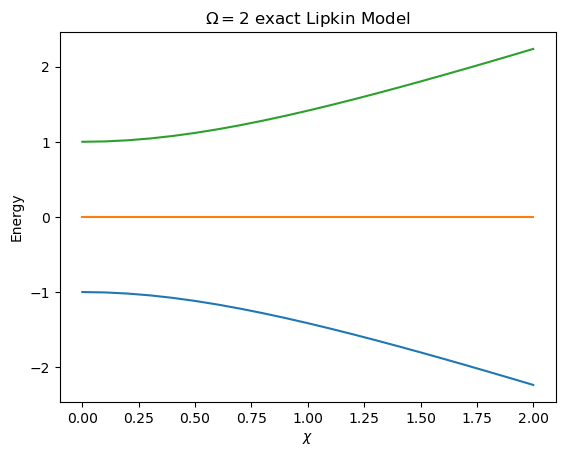

In [22]:
plt.plot(chi,EV0)
plt.plot(chi,EV1)
plt.plot(chi,EV2)
plt.xlabel('$\chi$')
plt.ylabel('Energy')
plt.title('$\Omega=2$ exact Lipkin Model')

### Quantum Circuit, rewriting the Lipkin model in terms of Pauli matrices

To solve the Lipkin model on a quantum computer we have to solve
Schrodinger's equation. To achieve this, we will use the Variational
Quantum Eigensolver (VQE) [discussed
earlier](https://github.com/CompPhysics/QuantumComputingMachineLearning/blob/gh-pages/doc/pub/week8/ipynb/week8.ipynb).

Before we proceed however, we need to rewrite the quasispin operators in terms of Pauli spin matrices/operators.

We take the liberty here of reminding you of some of the derivations done previously.
We defined the number operator as

$$
N=\sum_{n\sigma}a^\dagger_{n\sigma}a_{n\sigma},
$$

which commutes with the Lipkin Hamiltonian. This can be seen by
examining the Lipkin model Hamiltonian and noticing that the one-body
part simply counts particles while the two-body term moves particles
in pairs. Thus, the Hamiltonian conserves particle number. To find
more symmetries we rewrote the Lipkin Hamiltonian in terms of $SU(2)$ quasispin
operators

<!-- Equation labels as ordinary links -->
<div id="_auto17"></div>

$$
\begin{equation}
H = \epsilon J_z + \frac{1}{2}V(J^2_++J^2_-),
\label{_auto17} \tag{43}
\end{equation}
$$

via the mappings

$$
J_z=\sum_{n}j_z^{(n)},
$$

and

$$
J_\pm=\sum_nj^{(n)}_{\pm},
$$

where we have the onebody operators

$$
j_z^{(n)}=\frac{1}{2}\sum_{\sigma}\sigma a^\dagger_{n\sigma}a_{n\sigma},
$$

and

$$
j^{(n)}_{\pm}=a^\dagger_{n\pm}a_{n\mp}.
$$

These operators obey the $SU(2)$ commutation relations

$$
[J_+,J_-]=2J_z,
$$

and

$$
[J_z,J_\pm]=\pm J_\pm.
$$

Here the ladder operators are defined as $J_{\pm}= J_x\pm iJ_y$. With this rewriting, we can see that the total spin operator $J^2$, which is defined as

$$
J^2= J^2_x+J^2_y+J^2_z =
\frac{1}{2}\{J_+,J_-\}+J_z^2,
$$

commutes with the Hamiltonian since the Hamiltonian.
We note also that the rotation operator

$$
R=e^{i\phi J_z},
$$

commutes with the Hamiltonian, which can be explained as follows. Writing $J_z$ as

$$
J_z=\frac{1}{2}(N_+-N_-),
$$

where $N_\pm=\sum_{n\pm}a^\dagger_{n\pm}a_{n\pm}$, allows us to see that it measures half the difference between the number of particles in the upper and lower levels. Thus, the possible eigenvalues $r$ of the signature operator are

<!-- Equation labels as ordinary links -->
<div id="_auto18"></div>

$$
\begin{equation}
r=+1,  j_z=2n 
\label{_auto18} \tag{44}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto19"></div>

$$
\begin{equation} 
r=+i,  j_z=2n+\frac{1}{2} 
\label{_auto19} \tag{45}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto20"></div>

$$
\begin{equation} 
r=-1,  j_z=2n+1 
\label{_auto20} \tag{46}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto21"></div>

$$
\begin{equation} 
r=-i,  j_z=2n+\frac{3}{2} 
\label{_auto21} \tag{47}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto22"></div>

$$
\begin{equation} 
\label{_auto22} \tag{48}
\end{equation}
$$

for $n\in\mathbb{Z}$. Note that $r$ is real or imaginary if the number
of particles $N$ is even or odd, respectively. Since, as discussed
above, the Lipkin Hamiltonian conserves $N$, $r$ cannot jump between
being real and imaginary. Additionally, because particles must be
moved in pairs, and $J_z$ measures half the difference between
particles in the upper and lower levels, $j_z$ can only change by as

$$
j_z\rightarrow \frac{1}{2}[(N_+\pm 2n)-(N_-\mp 2n)]
$$

or $j_z\rightarrow J_z\pm2n$.

To solve the Lipkin model with a quantum computer, the first step is
to map the system to a set of qubits. We will restrict ourselves here
to the half-filled case where the number of particles $N$ equals the
degeneracy of the states $\Omega$. One could assign each possible
state $(n,\sigma)$ a qubit such that the qubit being in the state
$\vert 1\rangle$ or $\vert 0\rangle$ would imply that the state
$(n,\sigma)$ is occupied or unoccupied, respectively. This mapping
scheme (which we will call occupation mapping) requires 2$\Omega$
qubits.

However, because there are only two energy levels in the Lipkin model,
any other natural mapping is possible. In this mapping scheme (which
we will call level mapping) each doublet ($(n,+1)$, $(n,-1)$) would be
assigned a qubit such that the qubit being in the state $\vert 0\rangle$ or
$\vert 1\rangle$ would imply that the particle is in the $(n,+1)$ or $(n,-1)$
state, respectively. Note that these are the only two possible
configurations of the doublet as we are restricting ourselves to the
half-filled case and the Lipkin Hamiltonian only moves particles
between energy levels, not degenerate states. Thus the level mapping
only requires $\Omega$ qubits which is half that of the occupation
mapping. Additionally, any ansatz that would restrict the minimization
search to the correct subspace of constant Hamming weight $N$ requires
at most, only two qubit gates. This is because moving a pair of
particles in this scheme only changes the state of two doublets (and
therefore qubits). That is, it only takes a two-qubit gate to change
between the states $\vert 00\rangle$ and $\vert 11\rangle$, for example. As an
efficient decomposition two-qubit gates is known, the ansatz for this
mapping would be shorter (and thus less noisy) than that of the
previous mapping.

One could imagine a third mapping scheme which would require even less
qubits in which each of the possible states in the spin basis
$\vert JJ_z\rangle$ is mapped to a single qubit. In this spin mapping, there
are only $2J+1$ possible states (since $J_z=-J,-J+1,...,J-1,J$) for
each value of $J$. And, since the Hamiltonian is block diagonal (with
a different block for each $J$) the eigenvalues of the Hamiltonian are
simply the eigenvalues of each block, which may be calculated
separately. Since the maximum value of $J$ is $J_{\text{max}}=N/2$,
the largest number of qubits would be
$2J_{\text{max}}+1=N+1$. However, $\left\lfloor N/2 \right\rfloor$
different circuit would need to be used for minimization for all
possible values of $J$, to explore the entire Hilbert space. (The
minimum of the set of minimum energies that each circuit finds would
be the ground state energy of the entire system.) This increases,
linearly, the amount of time required to find the ground state energy.

After reviewing the three possible mappings, it is our view that the
level mapping is the best suited for NISQ era
devices given its low qubit count and ability to search the entire
relevant Hilbert space with one circuit (which reduces time to
solution) and the fact that at most, only two-qubit gates are required
of the ansatz, leading to shorter depth (and thus less noisy)
circuits.

The Hamiltonian takes the form

<!-- Equation labels as ordinary links -->
<div id="_auto23"></div>

$$
\begin{equation}
H=\epsilon J_z + \frac{1}{2}V(J^2_++J^2_-).
\label{_auto23} \tag{49}
\end{equation}
$$

Plugging the mapping from the total $J$ operators to the individual one-body $j$ operators yields

<!-- Equation labels as ordinary links -->
<div id="_auto24"></div>

$$
\begin{equation}
H = \epsilon\sum_{n}j_z^{(n)} + \frac{1}{2}V\left[\left(\sum_nj^{(n)}_{+}\right)^2+\left(\sum_nj^{(n)}_{-}\right)^2\right]
\label{_auto24} \tag{50}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto25"></div>

$$
\begin{equation} 
= \epsilon\sum_{n}j_z^{(n)} + \frac{1}{2}V\sum_{n,m}\left(j^{(n)}_+j^{(m)}_++j^{(n)}_-j^{(m)}_-\right)
\label{_auto25} \tag{51}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto26"></div>

$$
\begin{equation} 
= \epsilon\sum_{n}j_z^{(n)} + 2V\sum_{n<m}\left(j^{(n)}_xj^{(m)}_x-j^{(n)}_yj^{(m)}_y\right),
\label{_auto26} \tag{52}
\end{equation}
$$

where we have used the definitions

$$
j_{\pm}^{(n)}=j_x^{(n)}\pm ij_y^{(n)}.
$$

To convert to Pauli matrices, we make the transformations

$$
j_x^{(n)} \rightarrow X_n/2,
$$

and

$$
j_y^{(n)} \rightarrow Y_n/2,
$$

and finally

$$
j_z^{(n)} \rightarrow Z_n/2,
$$

which preserve the above $SU(2)$  commutation relations.
The factor of $1/2$
is due to the eigenvalues of the Pauli matrices being $\pm 1$
while we are dealing with spin $1/2$ particles.

This transforms our Hamiltonian into

$$
H=\frac{1}{2}\epsilon\sum_{k=1}^nZ_k+\frac{1}{2}V\sum_{n\neq j=1}^N(X_kX_j-Y_kY_j).
$$

With this form, we can clearly see that the first (one-body) term in
the Hamiltonian returns the energy $-\epsilon/2$ or $+\epsilon/2$ if
the qubit representing the particle of a doublet is in the ground
($\vert 1\rangle$) or excited ($\vert 0\rangle$) state,
respectively. The action of the second (two-body) term in the
Hamiltonian can be determined by noting that

<!-- Equation labels as ordinary links -->
<div id="_auto27"></div>

$$
\begin{equation}
\frac{1}{2}(XX-YY)\vert 00\rangle = \vert 11\rangle,
\label{_auto27} \tag{53}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto28"></div>

$$
\begin{equation} 
\frac{1}{2}(XX-YY)\vert 01\rangle = 0,
\label{_auto28} \tag{54}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto29"></div>

$$
\begin{equation} 
\frac{1}{2}(XX-YY)\vert 10\rangle = 0,
\label{_auto29} \tag{55}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto30"></div>

$$
\begin{equation} 
\frac{1}{2}(XX-YY)\vert 11\rangle = \vert 00\rangle.
\label{_auto30} \tag{56}
\end{equation}
$$

That is, the two-body term moves a pair of particles between the
ground states $\vert 00\rangle$ and the excited states $\vert
11\rangle$ of their respective doublets.

To construct an efficient ansatz, we must determine the subspace
within which the Hamiltonian lives. To begin, note that particles are
only ever moved between energy levels in pairs.
Further,
note that the Hamiltonian's coefficients ($\epsilon$ and $V$) are
state independent (do not depend on the indices $n$ or $m$) as the
states labeled by these indices are degenerate and thus have the same
energy level. Thus, the Hamiltonian treats all states with the same
number of excited particles (Hamming weight of the state) as the
same. Therefore, the following ansatz forms exactly cover the subspace
within which the $N$-degenerate Hamiltonian explores:

<!-- Equation labels as ordinary links -->
<div id="_auto31"></div>

$$
\begin{equation}
\vert \psi_{\text{even}}\rangle=\sum_{k=0}^{\lfloor n/2 \rfloor}c_{2k}\vert D^n_{2k}\rangle,
\label{_auto31} \tag{57}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto32"></div>

$$
\begin{equation} 
\vert \psi_{\text{odd}}\rangle=\sum_{k=0}^{\lfloor n/2 \rfloor}c_{2k+1}\vert D^n_{2k+1}\rangle.
\label{_auto32} \tag{58}
\end{equation}
$$

Here $\vert D^n_k\rangle$ represents a Dicke state which is defined as equal superposition of all $n$-qubit states with Hamming weight $k$. That is

<!-- Equation labels as ordinary links -->
<div id="_auto33"></div>

$$
\begin{equation}
\vert D^n_k\rangle= \frac{1}{\sqrt{{n \choose k}}}\sum_{x\in h^n_k}\vert x\rangle,
\label{_auto33} \tag{59}
\end{equation}
$$

where $h^n_k= \{\vert x\rangle \ | \ \text{l}(x) = n, \ \text{wt}(x) = k\}$. There are two ways we can think of to prepare such ansatz: The first is to prepare them exactly as it is known how to deterministically prepare Dicke states with linear depth. The reference provides an algorithm for preparing a set of gates $U^n_k$ that prepares a Dicke state from a product state of Hamming weight $k$; that is

<!-- Equation labels as ordinary links -->
<div id="_auto34"></div>

$$
\begin{equation}
U^n_k\vert 1\rangle^{\otimes k}\vert 0\rangle^{\otimes n-k}=\vert D^n_k\rangle.
\label{_auto34} \tag{60}
\end{equation}
$$

It then describes how to one can create an arbitrary superposition of Dicke states, which we modify here to restrict ourselves to a Hamming weight of constant parity. The circuit to construct such a state (for the $k=6$ case, as an example) is discussed next week.

## Implementing the  VQE method, one qubit system

We start with a simple $2\times 2$ Hamiltonian matrix expressed in
terms of Pauli $X$ and $Z$ matrices, as discussed in the project text.

We define a  symmetric matrix  $H\in {\mathbb{R}}^{2\times 2}$

$$
H = \begin{bmatrix} H_{11} & H_{12} \\ H_{21} & H_{22}
\end{bmatrix},
$$

We  let $H = H_0 + H_I$, where

$$
H_0= \begin{bmatrix} E_1 & 0 \\ 0 & E_2\end{bmatrix},
$$

is a diagonal matrix. Similarly,

$$
H_I= \begin{bmatrix} V_{11} & V_{12} \\ V_{21} & V_{22}\end{bmatrix},
$$

where $V_{ij}$ represent various interaction matrix elements.
We can view $H_0$ as the non-interacting solution

<!-- Equation labels as ordinary links -->
<div id="_auto35"></div>

$$
\begin{equation}
       H_0\vert 0 \rangle =E_1\vert 0 \rangle,
\label{_auto35} \tag{61}
\end{equation}
$$

and

<!-- Equation labels as ordinary links -->
<div id="_auto36"></div>

$$
\begin{equation}
       H_0\vert 1\rangle =E_2\vert 1\rangle,
\label{_auto36} \tag{62}
\end{equation}
$$

where we have defined the orthogonal computational one-qubit basis states $\vert 0\rangle$ and $\vert 1\rangle$.

We rewrite $H$ (and $H_0$ and $H_I$)  via Pauli matrices

$$
H_0 = \mathcal{E} I + \Omega \sigma_z, \quad \mathcal{E} = \frac{E_1
  + E_2}{2}, \; \Omega = \frac{E_1-E_2}{2},
$$

and

$$
H_I = c \boldsymbol{I} +\omega_z\sigma_z + \omega_x\sigma_x,
$$

with $c = (V_{11}+V_{22})/2$, $\omega_z = (V_{11}-V_{22})/2$ and $\omega_x = V_{12}=V_{21}$.
We let our Hamiltonian depend linearly on a strength parameter $\lambda$

$$
H=H_0+\lambda H_\mathrm{I},
$$

with $\lambda \in [0,1]$, where the limits $\lambda=0$ and $\lambda=1$
represent the non-interacting (or unperturbed) and fully interacting
system, respectively.  The model is an eigenvalue problem with only
two available states.

Here we set the parameters $E_1=0$,
$E_2=4$, $V_{11}=-V_{22}=3$ and $V_{12}=V_{21}=0.2$.

The non-interacting solutions represent our computational basis.
Pertinent to our choice of parameters, is that at $\lambda\geq 2/3$,
the lowest eigenstate is dominated by $\vert 1\rangle$ while the upper
is $\vert 0 \rangle$. At $\lambda=1$ the $\vert 0 \rangle$ mixing of
the lowest eigenvalue is $1\%$ while for $\lambda\leq 2/3$ we have a
$\vert 0 \rangle$ component of more than $90\%$.  The character of the
eigenvectors has therefore been interchanged when passing $z=2/3$. The
value of the parameter $V_{12}$ represents the strength of the coupling
between the two states.

## Setting up the matrix

In [23]:
from  matplotlib import pyplot as plt
import numpy as np
dim = 2
Hamiltonian = np.zeros((dim,dim))
e0 = 0.0
e1 = 4.0
Xnondiag = 0.20
Xdiag = 3.0
Eigenvalue = np.zeros(dim)
# setting up the Hamiltonian
Hamiltonian[0,0] = Xdiag+e0
Hamiltonian[0,1] = Xnondiag
Hamiltonian[1,0] = Hamiltonian[0,1]
Hamiltonian[1,1] = e1-Xdiag
# diagonalize and obtain eigenvalues, not necessarily sorted
EigValues, EigVectors = np.linalg.eig(Hamiltonian)
permute = EigValues.argsort()
EigValues = EigValues[permute]
# print only the lowest eigenvalue
print(EigValues[0])

0.9801960972814431


Now rewrite it in terms of the identity matrix and the Pauli matrix X and Z

In [24]:
# Now rewrite it in terms of the identity matrix and the Pauli matrix X and Z
X = np.array([[0,1],[1,0]])
Y = np.array([[0,-1j],[1j,0]])
Z = np.array([[1,0],[0,-1]])
# identity matrix
I = np.array([[1,0],[0,1]])

epsilon = (e0+e1)*0.5; omega = (e0-e1)*0.5
c = 0.0; omega_z=Xdiag; omega_x = Xnondiag
Hamiltonian = (epsilon+c)*I+(omega_z+omega)*Z+omega_x*X
EigValues, EigVectors = np.linalg.eig(Hamiltonian)
permute = EigValues.argsort()
EigValues = EigValues[permute]
# print only the lowest eigenvalue
print(EigValues[0])

0.9801960972814431


## Implementing the VQE

For a one-qubit system we can reach every point on the Bloch sphere
(as discussed earlier) with a rotation about the $x$-axis and the
$y$-axis.

We can express this mathematically through the following operations (see whiteboard for the drawing), giving us a new state $\vert \psi\rangle$

$$
\vert\psi\rangle = R_y(\phi)R_x(\theta)\vert 0 \rangle.
$$

We can produce multiple ansatzes for the new state in terms of the
angles $\theta$ and $\phi$.  With these ansatzes we can in turn
calculate the expectation value of the above Hamiltonian, now
rewritten in terms of various Pauli matrices (and thereby gates), that is compute

$$
\langle \psi \vert (c+\mathcal{E})\boldsymbol{I} + (\Omega+\omega_z)\boldsymbol{\sigma}_z + \omega_x\boldsymbol{\sigma}_x\vert \psi \rangle.
$$

We can now set up a series of ansatzes for $\vert \psi \rangle$ as
function of the angles $\theta$ and $\phi$ and find thereafter the
variational minimum using for example a gradient descent method.

To do so, we need to remind ourselves about the mathematical expressions for
the rotational matrices/operators.

$$
R_x(\theta)=\cos{\frac{\theta}{2}}\boldsymbol{I}-\imath \sin{\frac{\theta}{2}}\boldsymbol{\sigma}_x,
$$

and

$$
R_y(\phi)=\cos{\frac{\phi}{2}}\boldsymbol{I}-\imath \sin{\frac{\phi}{2}}\boldsymbol{\sigma}_y.
$$

In [25]:
# define the rotation matrices
# Define angles theta and phi
theta = 0.5*np.pi; phi = 0.2*np.pi
Rx = np.cos(theta*0.5)*I-1j*np.sin(theta*0.5)*X
Ry = np.cos(phi*0.5)*I-1j*np.sin(phi*0.5)*Y
#define basis states
basis0 = np.array([1,0])
basis1 = np.array([0,1])

NewBasis = Ry @ Rx @ basis0
print(NewBasis)
# Compute the expectation value
#Note hermitian conjugation
Energy = NewBasis.conj().T @ Hamiltonian @ NewBasis
print(Energy)

[0.67249851+0.21850801j 0.21850801-0.67249851j]
(2-1.187159067031975e-16j)


Not an impressive results. We set up now a loop over many angles $\theta$ and $\phi$ and compute the energies

In [26]:
# define a number of angles
n = 20
angle = np.arange(0,180,10)
n = np.size(angle)
ExpectationValues = np.zeros((n,n))
for i in range (n):
    theta = np.pi*angle[i]/180.0
    Rx = np.cos(theta*0.5)*I-1j*np.sin(theta*0.5)*X
    for j in range (n):
        phi = np.pi*angle[j]/180.0
        Ry = np.cos(phi*0.5)*I-1j*np.sin(phi*0.5)*Y
        NewBasis = Ry @ Rx @ basis0
        Energy = NewBasis.conj().T @ Hamiltonian @ NewBasis
        Edifference=abs(np.real(EigValues[0]-Energy))
        ExpectationValues[i,j]=Edifference

print(np.min(ExpectationValues))

0.01575557799303584


Clearly, this is not the very best way of proceeding. Rather, here we
would compute the gradient and thereby find the minimum as function of
the angles $\theta$ and $\phi$. Furthermore, in sertting up the
angles, a better practice is to select random values for these.

For the lectures of April 17-21, we will
add code example using gradient descent for the one- and two-qubit case. We will follow
<https://journals.aps.org/pra/abstract/10.1103/PhysRevA.99.032331> as a guideline to calculate gradients of the Hamiltonian.

## A smarter way of doing this

The above approach means that we are setting up several matrix-matrix
amd matrix-vector multiplications. Although straight forward it is not
the most efficient way of doing this, in particular in case the
matrices become large (and sparse). But there are some more important
issues.

In a physical realization of these systems we cannot just multiply the
state with the Hamiltonian. When performing a measurement we can only
measure in one particular direction. For the computational basis
states which we have, $\vert 0\rangle$ and $\vert 1\rangle$, we have
to measure along the bases of the Pauli matrices and reconstruct the
eigenvalues from these measurements.

From our earlier discussions we know that the Pauli $Z$ matrix has the above basis states as eigen states through

$$
\boldsymbol{\sigma}_z\vert 0 \rangle = \boldsymbol{Z}\vert 0 \rangle=+1\vert 0 \rangle,
$$

and

$$
\boldsymbol{\sigma}_z\vert 1 \rangle = \boldsymbol{Z}\vert 1 \rangle=-1\vert 1 \rangle,
$$

with eigenvalue $-1$.

For the Pauli $X$ matrix on the other hand we have

$$
\boldsymbol{\sigma}_x\vert 0 \rangle = \boldsymbol{X}\vert 0 \rangle=+1\vert 1 \rangle,
$$

and

$$
\boldsymbol{\sigma}_x\vert 1 \rangle = \boldsymbol{X}\vert 1 \rangle=-1\vert 0 \rangle,
$$

with eigenvalues $1$ in both cases. The latter two equations tell us
that the computational basis we have chosen, and in which we will
prepare our states, is not an eigenbasis of the $\sigma_x$ matrix.

We will thus try to rewrite the Pauli $X$ matrix in terms of a Pauli $Z$ matrix. Fortunately this can be done using the Hadamard matrix twice, that is

$$
\boldsymbol{X}=\boldsymbol{\sigma}_x=\boldsymbol{H}\boldsymbol{Z}\boldsymbol{H}.
$$

The Pauli $Y$ matrix can be written as

$$
\boldsymbol{Y}=\boldsymbol{\sigma}_y=\boldsymbol{H}\boldsymbol{S}^{\dagger}\boldsymbol{Z}\boldsymbol{H}\boldsymbol{S},
$$

where $S$ is the phase matrix

$$
S = \begin{bmatrix} 1 & 0 \\ 0 & \imath \end{bmatrix}.
$$

From here and on we will denote the Pauli matrices by $X$, $Y$ and $Z$ and we can write the expectation value of the Hamiltonian as

$$
\langle \psi \vert (c+\mathcal{E})\boldsymbol{I} + (\Omega+\omega_z)\boldsymbol{Z} + \omega_x\boldsymbol{H}\boldsymbol{Z}\boldsymbol{H}\vert \psi \rangle,
$$

which we can rewrite as

$$
(c+\mathcal{E})\langle \psi \vert \boldsymbol{I}\vert \psi \rangle+(\Omega+\omega_z)\langle \psi \vert \boldsymbol{Z}\vert \psi \rangle+\omega_x\langle \psi \boldsymbol{H}\vert \boldsymbol{Z}\vert\boldsymbol{H}\psi \rangle.
$$

The first and second term are to easy to perform a measurement on since we we just need to compute
$\langle \psi\vert \boldsymbol{I}\vert \psi\rangle$ and $\langle \psi\vert \boldsymbol{Z}\vert \psi\rangle$.
For the final term we need just to add the action of the Hadamard matrix and we are done.

## Two-qubit system and the VQE

We extend now the system  to a two-qubit system with the following computational
basis states and Hamiltonian matrix written out in terms of Pauli spin
matrices.

This system can be thought of as composed of two subsystems
$A$ and $B$. Each subsystem has computational basis states

$$
\vert 0\rangle_{\mathrm{A,B}}=\begin{bmatrix} 1 & 0\end{bmatrix}^T \hspace{1cm} \vert 1\rangle_{\mathrm{A,B}}=\begin{bmatrix} 0 & 1\end{bmatrix}^T.
$$

The subsystems could represent single particles or composite many-particle systems of a given symmetry.
This leads to the many-body computational basis states

$$
\vert 00\rangle = \vert 0\rangle_{\mathrm{A}}\otimes \vert 0\rangle_{\mathrm{B}}=\begin{bmatrix} 1 & 0 & 0 &0\end{bmatrix}^T,
$$

and

$$
\vert 01\rangle = \vert 0\rangle_{\mathrm{A}}\otimes \vert 1\rangle_{\mathrm{B}}=\begin{bmatrix} 0 & 1 & 0 &0\end{bmatrix}^T,
$$

and

$$
\vert 10\rangle = \vert 1\rangle_{\mathrm{A}}\otimes \vert 0\rangle_{\mathrm{B}}=\begin{bmatrix} 0 & 0 & 1 &0\end{bmatrix}^T,
$$

and finally

$$
\vert 11\rangle = \vert 1\rangle_{\mathrm{A}}\otimes \vert 1\rangle_{\mathrm{B}}=\begin{bmatrix} 0 & 0 & 0 &1\end{bmatrix}^T.
$$

These computational basis states define also the eigenstates of the non-interacting  Hamiltonian

$$
H_0\vert 00 \rangle = \epsilon_{00}\vert 00 \rangle,
$$

$$
H_0\vert 10 \rangle = \epsilon_{10}\vert 10 \rangle,
$$

$$
H_0\vert 01 \rangle = \epsilon_{01}\vert 01 \rangle,
$$

and

$$
H_0\vert 11 \rangle = \epsilon_{11}\vert 11 \rangle.
$$

The interacting part of the Hamiltonian $H_{\mathrm{I}}$ is given by the tensor product of two $\sigma_x$ and $\sigma_z$  matrices, respectively, that is

$$
H_{\mathrm{I}}=H_x\sigma_x\otimes\sigma_x+H_z\sigma_z\otimes\sigma_z,
$$

where $H_x$ and $H_z$ are interaction strength parameters. Our final Hamiltonian matrix is given by

$$
\boldsymbol{H}=\begin{bmatrix} \epsilon_{00}+H_z & 0 & 0 & H_x \\
                       0  & \epsilon_{10}-H_z & H_x & 0 \\
		       0 & H_x & \epsilon_{01}-H_z & 0 \\
		       H_x & 0 & 0 & \epsilon_{11} +H_z \end{bmatrix}.
$$

The four eigenstates of the above Hamiltonian matrix can in turn be used to
define density matrices. As an example, the density matrix of the
first eigenstate (lowest energy $E_0$) $\Psi_0$ is

$$
\rho_0=\left(\alpha_{00}\vert 00 \rangle\langle 00\vert+\alpha_{10}\vert 10 \rangle\langle 10\vert+\alpha_{01}\vert 01 \rangle\langle 01\vert+\alpha_{11}\vert 11 \rangle\langle 11\vert\right),
$$

where the coefficients $\alpha_{ij}$ are the eigenvector coefficients
resulting from the solution of the above eigenvalue problem.

## Switching to Qiskit (notes developed by Stian Bilek)

In [24]:
import numpy as np
import qiskit as qk
from scipy.optimize import minimize


# Initialize registers and circuit
n_qubits = 1 #Number of qubits
n_cbits = 1 #Number of classical bits (the number of qubits you want to measure at the end of the circuit)
qreg = qk.QuantumRegister(n_qubits) #Create a quantum register
creg = qk.ClassicalRegister(n_cbits) #Create a classical register
circuit = qk.QuantumCircuit(qreg,creg) #Create your quantum circuit
circuit.draw() #Draw circuit. It is empty
# Perform operations on qubit
circuit.x(qreg[0]) #Applies a Pauli X gate to the first qubit in the quantum register
circuit.draw()
# Chose a qubit to measure and encode the results to a classical bit
#Measure the first qubit in the quantum register
#and encode the results to the first qubit in the classical register
circuit.measure(qreg[0],creg[0])
circuit.draw()
# Execute circuit

backend = qk.Aer.get_backend('qasm_simulator') 
#This is the device you want to use. It is an ideal simulation of a quantum device


job = backend.run(circuit,shots=1000) #Run the circuit 1000 times
result = job.result()
counts = result.get_counts()
print(counts)
circuit.clear()
circuit.draw()

circuit.h(qreg[0]) #Apply a Hadamard gate to the first qubit of the quantum register
circuit.measure(qreg,creg)
print(circuit.draw())
job = backend.run(circuit,shots=1000)
result = job.result()
counts = result.get_counts()
print(counts)
circuit.clear()

Create a two-qubit circuit and set up a Bell state

In [25]:
n_qubits = 2
n_cbits = 2
qreg = qk.QuantumRegister(n_qubits)
creg = qk.ClassicalRegister(n_cbits)
circuit = qk.QuantumCircuit(qreg,creg)
circuit.draw()
circuit.h(qreg[0])
circuit.cx(qreg[0],qreg[1])

This is a controlled operation. Apply a Pauli $X$ gate to the second qubit (qreg[1]) if the first qubit (qreg[0])
is in the $|1\rangle$ state. Else do nothing

In [26]:
circuit.draw()
circuit.measure(qreg,creg)
circuit.draw()
job = backend.run(circuit,shots=1000)
result = job.result()
counts = result.get_counts()
print(counts)
circuit.clear()

Apply rotation to qubit

In [27]:
theta = np.pi/3
circuit.rx(theta, qreg[0]) #R_x(theta) rotation on the first qubit (qreg[0])
circuit.measure(qreg,creg)
print(circuit.draw())
job = backend.run(circuit,shots=1000)
result = job.result()
counts = result.get_counts()
circuit.clear()
print(counts)

Find the lowest eigenvalue of $$ H = c_1 Z_0 + c_2 Z_1 + c_3 X_0 Y_1 $$ 
We will use $$<\psi|H|\psi> = c_1<\psi|Z_0|\psi> + c_2<\psi|Z_1|\psi> + c_3<\psi|X_0Y_1|\psi> $$

In [28]:
I = np.eye(2)
X = np.array([[0,1],[1,0]])
Y = np.array([[0,-1j],[1j,0]])
Z = np.array([[1,0],[0,-1]])
H = np.kron(Z,I) + np.kron(I,Z) + np.kron(X,Y)
eigvals,eigvecs = np.linalg.eigh(H)
print(eigvals[0])

c_1 = 1
c_2 = 1
c_3 = 1

h_1 = [c_1,[0],['z']]
h_2 = [c_2,[1],['z']]
h_3 = [c_3,[0,1],['x','x']]
H = [h_1,h_2,h_3]

Create ansatz

In [29]:
def ansatz(theta,n_qubits):
    qreg = qk.QuantumRegister(n_qubits)
    circuit = qk.QuantumCircuit(qreg)
    for i in range(n_qubits):
        circuit.ry(theta[i],qreg[i])
    for i in range(n_qubits-1):
        circuit.cx(qreg[i],qreg[i+1])
    return(circuit)
qreg = qk.QuantumRegister(n_qubits)
circuit = qk.QuantumCircuit(qreg)
circuit.h(qreg[:2])
print('Before ansatz')
print(circuit.draw())
theta = np.random.randn(2)
n_qubits = 2
circuit = circuit.compose(ansatz(theta,n_qubits))
print('After ansatz')
circuit.draw()

Change measurement basis

In [30]:
def basis_change(h_i,n_qubits):
    qreg = qk.QuantumRegister(n_qubits)
    circuit = qk.QuantumCircuit(qreg)
    
    for qubit,operator in zip(h_i[1],h_i[2]):
        if operator == 'x':
            circuit.h(qreg[qubit])
        if operator == 'y':
            circuit.sdg(qreg[qubit])
            circuit.h(qreg[qubit])
    return(circuit)
n_qubits = 2
qreg = qk.QuantumRegister(n_qubits)
circuit = qk.QuantumCircuit(qreg)
theta = np.random.randn(n_qubits)
circuit = circuit.compose(ansatz(theta,n_qubits))
print('Ansatz circuit')
circuit.draw()
circuit = circuit.compose(basis_change(H[2],n_qubits))
print('After basis transformation:')
print(circuit.draw())

Get energy for given rotational parameters, theta

In [31]:
def get_energy(theta):
    n_qubits = 2
    qreg = qk.QuantumRegister(n_qubits)
    circuit = qk.QuantumCircuit(qreg)
    circuit = circuit.compose(ansatz(theta,n_qubits))
    circuit_list = []
    for idx,h_i in enumerate(H):
        basis_change_circuit = basis_change(h_i,n_qubits)
        new_circuit = circuit.compose(basis_change_circuit)
        creg = qk.ClassicalRegister(len(h_i[1]))
        new_circuit.add_register(creg)
        new_circuit.measure(qreg[h_i[1]],creg)
        circuit_list.append(new_circuit)
    shots = 10000
    job = backend.run(circuit_list,shots=shots)
    E = np.zeros(len(circuit_list))
    for i in range(len(circuit_list)):
        result = job.result()
        counts = result.get_counts(i)
        for key,value in counts.items():
            e = 1
            for bit in key:
                if bit == '0':
                    e *= 1
                if bit == '1':
                    e *= -1
            E[i] += e*value
        E[i] *= H[i][0]
    E /= shots
    return(np.sum(E))

theta = np.random.randn(2)
get_energy(theta)

Minimize energy with Scipy

In [32]:
theta = np.random.randn(2)
res = minimize(get_energy, theta, method='Powell',tol=1e-12)
get_energy(res.x)


# ## We might need a more flexible ansatz

def ansatz(theta,n_qubits):
    qreg = qk.QuantumRegister(n_qubits)
    circuit = qk.QuantumCircuit(qreg)
    idx = 0
    for i in range(n_qubits):
        circuit.ry(theta[idx],qreg[i])
        idx += 1
    for i in range(n_qubits-1):
        circuit.cx(qreg[i],qreg[i+1])
    for i in range(n_qubits):
        circuit.rx(theta[idx],qreg[i])
        idx += 1
    for i in range(n_qubits-1):
        circuit.cx(qreg[i],qreg[i+1])
    return(circuit)
theta = np.random.randn(4)
res = minimize(get_energy, theta, method='Powell',tol=1e-16)
get_energy(res.x)

Then we minimize energy with gradient descent

$$
\frac{\partial E (\theta_1,\dots,\theta_i,\dots,\theta_p)}{\partial \theta_i} = \frac{E(\theta_1,\dots,\theta_i + \pi/2,\dots, \theta_p) - E(\theta_1,\dots, \theta_i - \pi/2,\dots, \theta_p}{2}.
$$

In [33]:
epochs = 200
theta = np.random.randn(4)
for epoch in range(epochs):
    print(epoch,get_energy(theta))
    grad = np.zeros_like(theta)
    for idx in range(theta.shape[0]):
        theta_temp = theta.copy()
        theta_temp[idx] += np.pi/2
        E_plus = get_energy(theta_temp)
        theta_temp[idx] -= np.pi
        E_minus = get_energy(theta_temp)
        grad[idx] = (E_plus - E_minus)/2
    theta -= 0.1*grad

## VQE and efficient computations of gradients

We start with a reminder on the VQE method with applications to the
one-qubit system.  We discussed this to some detail during the week of
March 27-31. Here we revisit the one-qubit system and develop a VQE
code for studying this system using gradient descent as a method to
optimize the variational ansatz. 

We start with a simple $2\times 2$ Hamiltonian matrix expressed in
terms of Pauli $X$ and $Z$ matrices, as discussed in the project text.

We define a  symmetric matrix  $H\in {\mathbb{R}}^{2\times 2}$

$$
H = \begin{bmatrix} H_{11} & H_{12} \\ H_{21} & H_{22}
\end{bmatrix},
$$

We  let $H = H_0 + H_I$, where

$$
H_0= \begin{bmatrix} E_1 & 0 \\ 0 & E_2\end{bmatrix},
$$

is a diagonal matrix. Similarly,

$$
H_I= \begin{bmatrix} V_{11} & V_{12} \\ V_{21} & V_{22}\end{bmatrix},
$$

where $V_{ij}$ represent various interaction matrix elements.
We can view $H_0$ as the non-interacting solution

<!-- Equation labels as ordinary links -->
<div id="_auto37"></div>

$$
\begin{equation}
       H_0\vert 0 \rangle =E_1\vert 0 \rangle,
\label{_auto37} \tag{63}
\end{equation}
$$

and

<!-- Equation labels as ordinary links -->
<div id="_auto38"></div>

$$
\begin{equation}
       H_0\vert 1\rangle =E_2\vert 1\rangle,
\label{_auto38} \tag{64}
\end{equation}
$$

where we have defined the orthogonal computational one-qubit basis states $\vert 0\rangle$ and $\vert 1\rangle$.

We rewrite $H$ (and $H_0$ and $H_I$)  via Pauli matrices

$$
H_0 = \mathcal{E} I + \Omega \sigma_z, \quad \mathcal{E} = \frac{E_1
  + E_2}{2}, \; \Omega = \frac{E_1-E_2}{2},
$$

and

$$
H_I = c \boldsymbol{I} +\omega_z\sigma_z + \omega_x\sigma_x,
$$

with $c = (V_{11}+V_{22})/2$, $\omega_z = (V_{11}-V_{22})/2$ and $\omega_x = V_{12}=V_{21}$.
We let our Hamiltonian depend linearly on a strength parameter $\lambda$

$$
H=H_0+\lambda H_\mathrm{I},
$$

with $\lambda \in [0,1]$, where the limits $\lambda=0$ and $\lambda=1$
represent the non-interacting (or unperturbed) and fully interacting
system, respectively.  The model is an eigenvalue problem with only
two available states.

Here we set the parameters $E_1=0$,
$E_2=4$, $V_{11}=-V_{22}=3$ and $V_{12}=V_{21}=0.2$.

The non-interacting solutions represent our computational basis.
Pertinent to our choice of parameters, is that at $\lambda\geq 2/3$,
the lowest eigenstate is dominated by $\vert 1\rangle$ while the upper
is $\vert 0 \rangle$. At $\lambda=1$ the $\vert 0 \rangle$ mixing of
the lowest eigenvalue is $1\%$ while for $\lambda\leq 2/3$ we have a
$\vert 0 \rangle$ component of more than $90\%$.  The character of the
eigenvectors has therefore been interchanged when passing $z=2/3$. The
value of the parameter $V_{12}$ represents the strength of the coupling
between the two states.

## Setting up the matrix

In [34]:
from  matplotlib import pyplot as plt
import numpy as np
dim = 2
Hamiltonian = np.zeros((dim,dim))
e0 = 0.0
e1 = 4.0
Xnondiag = 0.20
Xdiag = 3.0
Eigenvalue = np.zeros(dim)
# setting up the Hamiltonian
Hamiltonian[0,0] = Xdiag+e0
Hamiltonian[0,1] = Xnondiag
Hamiltonian[1,0] = Hamiltonian[0,1]
Hamiltonian[1,1] = e1-Xdiag
# diagonalize and obtain eigenvalues, not necessarily sorted
EigValues, EigVectors = np.linalg.eig(Hamiltonian)
permute = EigValues.argsort()
EigValues = EigValues[permute]
# print only the lowest eigenvalue
print(EigValues[0])

Now rewrite it in terms of the identity matrix and the Pauli matrix X and Z

In [35]:
# Now rewrite it in terms of the identity matrix and the Pauli matrix X and Z
X = np.array([[0,1],[1,0]])
Y = np.array([[0,-1j],[1j,0]])
Z = np.array([[1,0],[0,-1]])
# identity matrix
I = np.array([[1,0],[0,1]])

epsilon = (e0+e1)*0.5; omega = (e0-e1)*0.5
c = 0.0; omega_z=Xdiag; omega_x = Xnondiag
Hamiltonian = (epsilon+c)*I+(omega_z+omega)*Z+omega_x*X
EigValues, EigVectors = np.linalg.eig(Hamiltonian)
permute = EigValues.argsort()
EigValues = EigValues[permute]
# print only the lowest eigenvalue
print(EigValues[0])

## Implementing the VQE

For a one-qubit system we can reach every point on the Bloch sphere
(as discussed earlier) with a rotation about the $x$-axis and the
$y$-axis.

We can express this mathematically through the following operations (see whiteboard for the drawing), giving us a new state $\vert \psi\rangle$

$$
\vert\psi\rangle = R_y(\phi)R_x(\theta)\vert 0 \rangle.
$$

We can produce multiple ansatzes for the new state in terms of the
angles $\theta$ and $\phi$.  With these ansatzes we can in turn
calculate the expectation value of the above Hamiltonian, now
rewritten in terms of various Pauli matrices (and thereby gates), that is compute

$$
\langle \psi \vert (c+\mathcal{E})\boldsymbol{I} + (\Omega+\omega_z)\boldsymbol{\sigma}_z + \omega_x\boldsymbol{\sigma}_x\vert \psi \rangle.
$$

We can now set up a series of ansatzes for $\vert \psi \rangle$ as
function of the angles $\theta$ and $\phi$ and find thereafter the
variational minimum using for example a gradient descent method.

To do so, we need to remind ourselves about the mathematical expressions for
the rotational matrices/operators.

$$
R_x(\theta)=\cos{\frac{\theta}{2}}\boldsymbol{I}-\imath \sin{\frac{\theta}{2}}\boldsymbol{\sigma}_x,
$$

and

$$
R_y(\phi)=\cos{\frac{\phi}{2}}\boldsymbol{I}-\imath \sin{\frac{\phi}{2}}\boldsymbol{\sigma}_y.
$$

In [36]:
# define the rotation matrices
# Define angles theta and phi
theta = 0.5*np.pi; phi = 0.2*np.pi
Rx = np.cos(theta*0.5)*I-1j*np.sin(theta*0.5)*X
Ry = np.cos(phi*0.5)*I-1j*np.sin(phi*0.5)*Y
#define basis states
basis0 = np.array([1,0])
basis1 = np.array([0,1])

NewBasis = Ry @ Rx @ basis0
print(NewBasis)
# Compute the expectation value
#Note hermitian conjugation
Energy = NewBasis.conj().T @ Hamiltonian @ NewBasis
print(Energy)

Not an impressive results. We set up now a loop over many angles $\theta$ and $\phi$ and compute the energies

In [37]:
# define a number of angles
n = 20
angle = np.arange(0,180,10)
n = np.size(angle)
ExpectationValues = np.zeros((n,n))
for i in range (n):
    theta = np.pi*angle[i]/180.0
    Rx = np.cos(theta*0.5)*I-1j*np.sin(theta*0.5)*X
    for j in range (n):
        phi = np.pi*angle[j]/180.0
        Ry = np.cos(phi*0.5)*I-1j*np.sin(phi*0.5)*Y
        NewBasis = Ry @ Rx @ basis0
        Energy = NewBasis.conj().T @ Hamiltonian @ NewBasis
        Edifference=abs(np.real(EigValues[0]-Energy))
        ExpectationValues[i,j]=Edifference

print(np.min(ExpectationValues))

Clearly, this is not the best way of proceeding. Rather, here we
could try to find the optimal values for the parameters $\theta$ and
$\phi$ through computation of their respective gradients and thereby
find the minimum as function of the optimal angles $\hat{\theta}$ and
$\hat{\phi}$.

Let us now implement a classical gradient descent algorithm to the computation of the energies. 
We will follow closely  <https://journals.aps.org/pra/abstract/10.1103/PhysRevA.99.032331> in order to calculate gradients of the Hamiltonian.

## Gradient descent and calculations of gradients

In order to optimize the VQE ansatz, we need to compute derivatives
with respect to the variational parameters.  Here we develop first a
simpler approach tailored to the one-qubit case. For this particular
case, we have defined an ansatz in terms of the Pauli rotation
matrices. These define an arbitrary one-qubit state on the Bloch
sphere through the expression

$$
\vert\psi\rangle = \vert \psi(\theta,\phi)\rangle =R_y(\phi)R_x(\theta)\vert 0 \rangle.
$$

Each of these rotation matrices can be written in a more general form as

$$
R_{i}(\gamma)=\exp{-(\imath\frac{\gamma}{2}\sigma_i)}=\cos{(\frac{\gamma}{2})}\boldsymbol{I}-\imath\sin{(\frac{\gamma}{2})}\boldsymbol{\sigma}_i,
$$

where $\sigma_i$ is one of the Pauli matrices $\sigma_{x,y,z}$. 

It is easy to see that the derivative with respect to $\gamma$ is

$$
\frac{\partial R_{i}(\gamma)}{\partial \gamma}=-\frac{\gamma}{2}\boldsymbol{\sigma}_i R_{i}(\gamma).
$$

We can now calculate the derivative of the expectation value of the
Hamiltonian in terms of the angles $\theta$ and $\phi$. We have two
derivatives

$$
\frac{\partial}{\partial \theta}\left[\langle \psi(\theta,\phi) \vert \boldsymbol{H}\vert \psi(\theta,\phi)\rangle\right]=\frac{\partial}{\partial \theta}\left[\langle\boldsymbol{H}(\theta,\phi)\rangle\right]=\langle \psi(\theta,\phi) \vert \boldsymbol{H}(-\frac{\imath}{2}\boldsymbol{\sigma}_x\vert \psi(\theta,\phi)\rangle+\hspace{0.1cm}\mathrm{h.c},
$$

and

$$
\frac{\partial }{\partial \phi}\left[\langle \psi(\theta,\phi) \vert \boldsymbol{H}\vert \psi(\theta,\phi)\rangle\right]=\frac{\partial}{\partial \phi}\left[\langle\boldsymbol{H}(\theta,\phi)\rangle\right]=\langle \psi(\theta,\phi) \vert \boldsymbol{H}(-\frac{\imath}{2}\boldsymbol{\sigma}_y\vert \psi(\theta,\phi)\rangle+\hspace{0.1cm}\mathrm{h.c}.
$$

This means that we have to calculate two additional expectation values
in addition to the expectation value of the Hamiltonian itself.  If we
stay with an ansatz for the single qubit states given by the above
rotation operators, we can, following for example [the article by
Maria Schuld et
al](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.99.032331),
show that the derivative of the expectation value of the Hamiltonian
can be written as (we focus only on a given angle $\phi$)

$$
\frac{\partial}{\partial \phi}\left[\langle\boldsymbol{H}(\phi)\rangle\right]=\frac{1}{2}\left[\langle\boldsymbol{H}(\phi+\frac{\pi}{2})\rangle-\langle\boldsymbol{H}(\phi-\frac{\pi}{2})\rangle\right].
$$

To see this, consider again the definition of the rotation operators.
We can write these operators as

$$
R_i(\phi)=\exp{-\imath(\phi \boldsymbol{\sigma}_i)},
$$

with $\boldsymbol{sigma}_i$, with $\boldsymbol{\sigma}_i$ being any of the Pauli
matrices $X$, $Y$ and $Z$. The latter can be generalized to other
unitary matrices as well.
The derivative with respect to $\phi$ gives

$$
\frac{\partial R_i(\phi)}{\partial \phi}=-\frac{\imath}{2} \boldsymbol{\sigma}_i\exp{-\imath(\phi \boldsymbol{\sigma}_i)}=-\frac{\imath}{2} \boldsymbol{\sigma} R_i(\phi).
$$

Our ansatz for a general one-qubit state on the Bloch sphere contains the product of a rotation around the $x$-axis and the $y$-axis. In the derivation here we focus only on one angle however. Our ansatz is then given by

$$
\vert \psi \rangle = R_i(\phi)\vert 0 \rangle,
$$

and the expectation value of our Hamiltonian is

$$
\langle \psi \vert \hat{H}\vert \psi \rangle = \langle 0 \vert R_i(\phi)^{\dagger} \hat{H}R_i(\phi)\vert 0\rangle.
$$

Our derivative with respect to the angle $\phi$ has a similar structure, that is

$$
\frac{\partial }{\partial \phi}\left[\langle \psi(\theta,\phi) \vert \boldsymbol{H}\vert \psi(\theta,\phi)\rangle\right]=\langle \psi(\theta,\phi) \vert \boldsymbol{H}(-\frac{\imath}{2}\boldsymbol{\sigma}_y\vert \psi(\theta,\phi)\rangle+\hspace{0.1cm}\mathrm{h.c}.
$$

In order to rewrite the equation of the derivative,
the following relation is useful

$$
\langle \psi \vert \hat{A}^{\dagger}\hat{B}\hat{C}\vert \psi \rangle = \frac{1}{2}\left[
\langle \psi \vert (\hat{A}+\hat{C})^{\dagger}\hat{B}(\boldsymbol{A}+\hat{C})\vert \psi \rangle-\langle \psi \vert (\hat{A}-\hat{C})^{\dagger}\hat{B}(\boldsymbol{A}-\hat{C})\vert \psi \rangle\right],
$$

where $\hat{A}$, $\hat{B}$ and $\hat{C}$ are arbitrary hermitian
operators.  If we identify these operators as $\hat{A}=\boldsymbol{I}$, with
$\boldsymbol{I}$ being the unit operator, $\hat{B}=\hat{H}$ our Hamiltonian,
and $\hat{C}=-\imath \boldsymbol{\sigma}_i/2$, we obtain the following
expression for the expectation value of the derivative (excluding the hermitian conjugate)

$$
\langle \psi \vert \boldsymbol{I}^{\dagger}\hat{H}(-\frac{\imath}{2}\boldsymbol{\sigma}_i\vert \psi \rangle = \frac{1}{2}\left[
\langle \psi \vert (\boldsymbol{I}-\frac{\imath}{2} \boldsymbol{\sigma}_i)^{\dagger}\hat{H}(\boldsymbol{I}-\frac{\imath}{2} \boldsymbol{\sigma}_i)\vert \psi \rangle-\langle \psi \vert (\boldsymbol{I}+\frac{\imath}{2} \boldsymbol{\sigma}_i)^{\dagger}\hat{H}(\boldsymbol{I}+\frac{\imath}{2} \boldsymbol{\sigma}_i)\vert \psi \rangle\right].
$$

If we then use that the rotation matrices can be rewritten as

$$
R_{i}(\phi)=\exp{-(\imath\frac{\phi}{2}\sigma_i)}=\cos{(\frac{\phi}{2})}\boldsymbol{I}-\imath\sin{(\frac{\phi}{2})}\boldsymbol{\sigma}_i,
$$

we see that if we set the angle to $\phi=\pi/2$, we have

$$
R_{i}(\frac{\pi}{2})=\cos{(\frac{\pi}{4})}\boldsymbol{I}-\imath\sin{(\frac{\pi}{4})}\boldsymbol{\sigma}_i=\frac{1}{\sqrt{2}}\left(\boldsymbol{I}-\frac{\imath}{2} \boldsymbol{\sigma}_i\right).
$$

This means that we can write

$$
\langle \psi \vert \boldsymbol{I}^{\dagger}\hat{H}(-\frac{\imath}{2}\boldsymbol{\sigma}_i\vert \psi \rangle = \frac{1}{2}\left[
\langle \psi \vert R_i(\frac{\pi}{2})^{\dagger}\hat{H}R_i(\frac{\pi}{2})\vert \psi \rangle-\langle \psi \vert R_i(-\frac{\pi}{2})^{\dagger}\hat{H}R_i(-\frac{\pi}{2})^{\dagger}\vert \psi \rangle\right]=\frac{1}{2}(\langle\hat{H}(\phi+\frac{\pi}{2})\rangle-\langle\hat{H}(\phi-\frac{\pi}{2})\rangle).
$$

## Basics of gradient descent and stochastic gradient descent

In order to implement the above equations, we need to remind the
reader about basic elements of various optimization approaches. Our
main focus here will be various gradient descent approaches, with and
without momentum and various approaches for approximating the second
derivatives via adaptive methods.

The material here is covered by the lectures from [FYS-STK4155 on gradient optimization](https://github.com/CompPhysics/MachineLearning/blob/master/doc/pub/week39/ipynb/week39.ipynb).

We will repeat some of the basic ingredients from these lectures.

## Brief reminder on Newton-Raphson's method

Let us quickly remind ourselves how we derive the above method.

Perhaps the most celebrated of all one-dimensional root-finding
routines is Newton's method, also called the Newton-Raphson
method. This method  requires the evaluation of both the
function $f$ and its derivative $f'$ at arbitrary points. 
If you can only calculate the derivative
numerically and/or your function is not of the smooth type, we
normally discourage the use of this method.

## The equations

The Newton-Raphson formula consists geometrically of extending the
tangent line at a current point until it crosses zero, then setting
the next guess to the abscissa of that zero-crossing.  The mathematics
behind this method is rather simple. Employing a Taylor expansion for
$x$ sufficiently close to the solution $s$, we have

<!-- Equation labels as ordinary links -->
<div id="eq:taylornr"></div>

$$
f(s)=0=f(x)+(s-x)f'(x)+\frac{(s-x)^2}{2}f''(x) +\dots.
    \label{eq:taylornr} \tag{65}
$$

For small enough values of the function and for well-behaved
functions, the terms beyond linear are unimportant, hence we obtain

$$
f(x)+(s-x)f'(x)\approx 0,
$$

yielding

$$
s\approx x-\frac{f(x)}{f'(x)}.
$$

Having in mind an iterative procedure, it is natural to start iterating with

$$
x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}.
$$

## Simple geometric interpretation

The above is Newton-Raphson's method. It has a simple geometric
interpretation, namely $x_{n+1}$ is the point where the tangent from
$(x_n,f(x_n))$ crosses the $x$-axis.  Close to the solution,
Newton-Raphson converges fast to the desired result. However, if we
are far from a root, where the higher-order terms in the series are
important, the Newton-Raphson formula can give grossly inaccurate
results. For instance, the initial guess for the root might be so far
from the true root as to let the search interval include a local
maximum or minimum of the function.  If an iteration places a trial
guess near such a local extremum, so that the first derivative nearly
vanishes, then Newton-Raphson may fail totally

## Extending to more than one variable

Newton's method can be generalized to systems of several non-linear equations
and variables. Consider the case with two equations

$$
\begin{array}{cc} f_1(x_1,x_2) &=0\\
                     f_2(x_1,x_2) &=0,\end{array}
$$

which we Taylor expand to obtain

$$
\begin{array}{cc} 0=f_1(x_1+h_1,x_2+h_2)=&f_1(x_1,x_2)+h_1
                     \partial f_1/\partial x_1+h_2
                     \partial f_1/\partial x_2+\dots\\
                     0=f_2(x_1+h_1,x_2+h_2)=&f_2(x_1,x_2)+h_1
                     \partial f_2/\partial x_1+h_2
                     \partial f_2/\partial x_2+\dots
                       \end{array}.
$$

Defining the Jacobian matrix ${\bf \boldsymbol{J}}$ we have

$$
{\bf \boldsymbol{J}}=\left( \begin{array}{cc}
                         \partial f_1/\partial x_1  & \partial f_1/\partial x_2 \\
                          \partial f_2/\partial x_1     &\partial f_2/\partial x_2
             \end{array} \right),
$$

we can rephrase Newton's method as

$$
\left(\begin{array}{c} x_1^{n+1} \\ x_2^{n+1} \end{array} \right)=
\left(\begin{array}{c} x_1^{n} \\ x_2^{n} \end{array} \right)+
\left(\begin{array}{c} h_1^{n} \\ h_2^{n} \end{array} \right),
$$

where we have defined

$$
\left(\begin{array}{c} h_1^{n} \\ h_2^{n} \end{array} \right)=
   -{\bf \boldsymbol{J}}^{-1}
   \left(\begin{array}{c} f_1(x_1^{n},x_2^{n}) \\ f_2(x_1^{n},x_2^{n}) \end{array} \right).
$$

We need thus to compute the inverse of the Jacobian matrix and it
is to understand that difficulties  may
arise in case ${\bf \boldsymbol{J}}$ is nearly singular.

It is rather straightforward to extend the above scheme to systems of
more than two non-linear equations. In our case, the Jacobian matrix is given by the Hessian that represents the second derivative of cost function.

## Steepest descent

The basic idea of gradient descent is
that a function $F(\mathbf{x})$, 
$\mathbf{x} \equiv (x_1,\cdots,x_n)$, decreases fastest if one goes from $\bf {x}$ in the
direction of the negative gradient $-\nabla F(\mathbf{x})$.

It can be shown that if

$$
\mathbf{x}_{k+1} = \mathbf{x}_k - \gamma_k \nabla F(\mathbf{x}_k),
$$

with $\gamma_k > 0$.

For $\gamma_k$ small enough, then $F(\mathbf{x}_{k+1}) \leq
F(\mathbf{x}_k)$. This means that for a sufficiently small $\gamma_k$
we are always moving towards smaller function values, i.e a minimum.

## More on Steepest descent

The previous observation is the basis of the method of steepest
descent, which is also referred to as just gradient descent (GD). One
starts with an initial guess $\mathbf{x}_0$ for a minimum of $F$ and
computes new approximations according to

$$
\mathbf{x}_{k+1} = \mathbf{x}_k - \gamma_k \nabla F(\mathbf{x}_k), \ \ k \geq 0.
$$

The parameter $\gamma_k$ is often referred to as the step length or
the learning rate within the context of Machine Learning.

## The ideal

Ideally the sequence $\{\mathbf{x}_k \}_{k=0}$ converges to a global
minimum of the function $F$. In general we do not know if we are in a
global or local minimum. In the special case when $F$ is a convex
function, all local minima are also global minima, so in this case
gradient descent can converge to the global solution. The advantage of
this scheme is that it is conceptually simple and straightforward to
implement. However the method in this form has some severe
limitations:

In machine learing we are often faced with non-convex high dimensional
cost functions with many local minima. Since GD is deterministic we
will get stuck in a local minimum, if the method converges, unless we
have a very good intial guess. This also implies that the scheme is
sensitive to the chosen initial condition.

Note that the gradient is a function of $\mathbf{x} =
(x_1,\cdots,x_n)$ which makes it expensive to compute numerically.

## The sensitiveness of the gradient descent

The gradient descent method 
is sensitive to the choice of learning rate $\gamma_k$. This is due
to the fact that we are only guaranteed that $F(\mathbf{x}_{k+1}) \leq
F(\mathbf{x}_k)$ for sufficiently small $\gamma_k$. The problem is to
determine an optimal learning rate. If the learning rate is chosen too
small the method will take a long time to converge and if it is too
large we can experience erratic behavior.

Many of these shortcomings can be alleviated by introducing
randomness. One such method is that of Stochastic Gradient Descent
(SGD), see below.

## Convex functions

Ideally we want our cost/loss function to be convex(concave).

First we give the definition of a convex set: A set $C$ in
$\mathbb{R}^n$ is said to be convex if, for all $x$ and $y$ in $C$ and
all $t \in (0,1)$ , the point $(1 − t)x + ty$ also belongs to
C. Geometrically this means that every point on the line segment
connecting $x$ and $y$ is in $C$ as discussed below.

The convex subsets of $\mathbb{R}$ are the intervals of
$\mathbb{R}$. Examples of convex sets of $\mathbb{R}^2$ are the
regular polygons (triangles, rectangles, pentagons, etc...).

## Convex function

**Convex function**: Let $X \subset \mathbb{R}^n$ be a convex set. Assume that the function $f: X \rightarrow \mathbb{R}$ is continuous, then $f$ is said to be convex if $$f(tx_1 + (1-t)x_2) \leq tf(x_1) + (1-t)f(x_2) $$ for all $x_1, x_2 \in X$ and for all $t \in [0,1]$. If $\leq$ is replaced with a strict inequaltiy in the definition, we demand $x_1 \neq x_2$ and $t\in(0,1)$ then $f$ is said to be strictly convex. For a single variable function, convexity means that if you draw a straight line connecting $f(x_1)$ and $f(x_2)$, the value of the function on the interval $[x_1,x_2]$ is always below the line as illustrated below.

## Conditions on convex functions

In the following we state first and second-order conditions which
ensures convexity of a function $f$. We write $D_f$ to denote the
domain of $f$, i.e the subset of $R^n$ where $f$ is defined. For more
details and proofs we refer to: [S. Boyd and L. Vandenberghe. Convex Optimization. Cambridge University Press](http://stanford.edu/boyd/cvxbook/, 2004).

**First order condition.**

Suppose $f$ is differentiable (i.e $\nabla f(x)$ is well defined for
all $x$ in the domain of $f$). Then $f$ is convex if and only if $D_f$
is a convex set and $$f(y) \geq f(x) + \nabla f(x)^T (y-x) $$ holds
for all $x,y \in D_f$. This condition means that for a convex function
the first order Taylor expansion (right hand side above) at any point
a global under estimator of the function. To convince yourself you can
make a drawing of $f(x) = x^2+1$ and draw the tangent line to $f(x)$ and
note that it is always below the graph.

**Second order condition.**

Assume that $f$ is twice
differentiable, i.e the Hessian matrix exists at each point in
$D_f$. Then $f$ is convex if and only if $D_f$ is a convex set and its
Hessian is positive semi-definite for all $x\in D_f$. For a
single-variable function this reduces to $f''(x) \geq 0$. Geometrically this means that $f$ has nonnegative curvature
everywhere.

This condition is particularly useful since it gives us an procedure for determining if the function under consideration is convex, apart from using the definition.

## More on convex functions

The next result is of great importance to us and the reason why we are
going on about convex functions. In machine learning we frequently
have to minimize a loss/cost function in order to find the best
parameters for the model we are considering. 

Ideally we want the
global minimum (for high-dimensional models it is hard to know
if we have local or global minimum). However, if the cost/loss function
is convex the following result provides invaluable information:

**Any minimum is global for convex functions.**

Consider the problem of finding $x \in \mathbb{R}^n$ such that $f(x)$
is minimal, where $f$ is convex and differentiable. Then, any point
$x^*$ that satisfies $\nabla f(x^*) = 0$ is a global minimum.

This result means that if we know that the cost/loss function is convex and we are able to find a minimum, we are guaranteed that it is a global minimum.

## Some simple problems

1. Show that $f(x)=x^2$ is convex for $x \in \mathbb{R}$ using the definition of convexity. Hint: If you re-write the definition, $f$ is convex if the following holds for all $x,y \in D_f$ and any $\lambda \in [0,1]$ $\lambda f(x)+(1-\lambda)f(y)-f(\lambda x + (1-\lambda) y ) \geq 0$.

2. Using the second order condition show that the following functions are convex on the specified domain.

 * $f(x) = e^x$ is convex for $x \in \mathbb{R}$.

 * $g(x) = -\ln(x)$ is convex for $x \in (0,\infty)$.

3. Let $f(x) = x^2$ and $g(x) = e^x$. Show that $f(g(x))$ and $g(f(x))$ is convex for $x \in \mathbb{R}$. Also show that if $f(x)$ is any convex function than $h(x) = e^{f(x)}$ is convex.

4. A norm is any function that satisfy the following properties

 * $f(\alpha x) = |\alpha| f(x)$ for all $\alpha \in \mathbb{R}$.

 * $f(x+y) \leq f(x) + f(y)$

 * $f(x) \leq 0$ for all $x \in \mathbb{R}^n$ with equality if and only if $x = 0$

Using the definition of convexity, try to show that a function satisfying the properties above is convex (the third condition is not needed to show this).

## Gradient descent example

Let $\mathbf{y} = (y_1,\cdots,y_n)^T$, $\mathbf{\boldsymbol{y}} = (\boldsymbol{y}_1,\cdots,\boldsymbol{y}_n)^T$ and $\beta = (\beta_0, \beta_1)^T$

It is convenient to write $\mathbf{\boldsymbol{y}} = X\beta$ where $X \in \mathbb{R}^{100 \times 2} $ is the design matrix given by (we keep the intercept here)

$$
X \equiv \begin{bmatrix}
1 & x_1  \\
\vdots & \vdots  \\
1 & x_{100} &  \\
\end{bmatrix}.
$$

The cost/loss/risk function is given by (

$$
C(\beta) = \frac{1}{n}||X\beta-\mathbf{y}||_{2}^{2} = \frac{1}{n}\sum_{i=1}^{100}\left[ (\beta_0 + \beta_1 x_i)^2 - 2 y_i (\beta_0 + \beta_1 x_i) + y_i^2\right]
$$

and we want to find $\beta$ such that $C(\beta)$ is minimized.

## The derivative of the cost/loss function

Computing $\partial C(\beta) / \partial \beta_0$ and $\partial C(\beta) / \partial \beta_1$ we can show  that the gradient can be written as

$$
\nabla_{\beta} C(\beta) = \frac{2}{n}\begin{bmatrix} \sum_{i=1}^{100} \left(\beta_0+\beta_1x_i-y_i\right) \\
\sum_{i=1}^{100}\left( x_i (\beta_0+\beta_1x_i)-y_ix_i\right) \\
\end{bmatrix} = \frac{2}{n}X^T(X\beta - \mathbf{y}),
$$

where $X$ is the design matrix defined above.

## The Hessian matrix
The Hessian matrix of $C(\beta)$ is given by

$$
\boldsymbol{H} \equiv \begin{bmatrix}
\frac{\partial^2 C(\beta)}{\partial \beta_0^2} & \frac{\partial^2 C(\beta)}{\partial \beta_0 \partial \beta_1}  \\
\frac{\partial^2 C(\beta)}{\partial \beta_0 \partial \beta_1} & \frac{\partial^2 C(\beta)}{\partial \beta_1^2} &  \\
\end{bmatrix} = \frac{2}{n}X^T X.
$$

This result implies that $C(\beta)$ is a convex function since the matrix $X^T X$ always is positive semi-definite.

## Simple program

We can now write a program that minimizes $C(\beta)$ using the gradient descent method with a constant learning rate $\gamma$ according to

$$
\beta_{k+1} = \beta_k - \gamma \nabla_\beta C(\beta_k), \ k=0,1,\cdots
$$

We can use the expression we computed for the gradient and let use a
$\beta_0$ be chosen randomly and let $\gamma = 0.001$. Stop iterating
when $||\nabla_\beta C(\beta_k) || \leq \epsilon = 10^{-8}$. **Note that the code below does not include the latter stop criterion**.

And finally we can compare our solution for $\beta$ with the analytic result given by 
$\beta= (X^TX)^{-1} X^T \mathbf{y}$.

## Gradient Descent Example

Here our simple example

In [38]:

# Importing various packages
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys

# the number of datapoints
n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
# Hessian matrix
H = (2.0/n)* X.T @ X
# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

beta_linreg = np.linalg.inv(X.T @ X) @ X.T @ y
print(beta_linreg)
beta = np.random.randn(2,1)

eta = 1.0/np.max(EigValues)
Niterations = 1000

for iter in range(Niterations):
    gradient = (2.0/n)*X.T @ (X @ beta-y)
    beta -= eta*gradient

print(beta)
xnew = np.array([[0],[2]])
xbnew = np.c_[np.ones((2,1)), xnew]
ypredict = xbnew.dot(beta)
ypredict2 = xbnew.dot(beta_linreg)
plt.plot(xnew, ypredict, "r-")
plt.plot(xnew, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Gradient descent example')
plt.show()

## Using gradient descent methods, limitations

* **Gradient descent (GD) finds local minima of our function**. Since the GD algorithm is deterministic, if it converges, it will converge to a local minimum of our cost/loss/risk function. Because in ML we are often dealing with extremely rugged landscapes with many local minima, this can lead to poor performance.

* **GD is sensitive to initial conditions**. One consequence of the local nature of GD is that initial conditions matter. Depending on where one starts, one will end up at a different local minima. Therefore, it is very important to think about how one initializes the training process. This is true for GD as well as more complicated variants of GD.

* **Gradients are computationally expensive to calculate for large datasets**. In many cases in statistics and ML, the cost/loss/risk function is a sum of terms, with one term for each data point. For example, in linear regression, $E \propto \sum_{i=1}^n (y_i - \mathbf{w}^T\cdot\mathbf{x}_i)^2$; for logistic regression, the square error is replaced by the cross entropy. To calculate the gradient we have to sum over *all* $n$ data points. Doing this at every GD step becomes extremely computationally expensive. An ingenious solution to this, is to calculate the gradients using small subsets of the data called "mini batches". This has the added benefit of introducing stochasticity into our algorithm.

* **GD is very sensitive to choices of learning rates**. GD is extremely sensitive to the choice of learning rates. If the learning rate is very small, the training process take an extremely long time. For larger learning rates, GD can diverge and give poor results. Furthermore, depending on what the local landscape looks like, we have to modify the learning rates to ensure convergence. Ideally, we would *adaptively* choose the learning rates to match the landscape.

* **GD treats all directions in parameter space uniformly.** Another major drawback of GD is that unlike Newton's method, the learning rate for GD is the same in all directions in parameter space. For this reason, the maximum learning rate is set by the behavior of the steepest direction and this can significantly slow down training. Ideally, we would like to take large steps in flat directions and small steps in steep directions. Since we are exploring rugged landscapes where curvatures change, this requires us to keep track of not only the gradient but second derivatives. The ideal scenario would be to calculate the Hessian but this proves to be too computationally expensive. 

* GD can take exponential time to escape saddle points, even with random initialization. As we mentioned, GD is extremely sensitive to initial condition since it determines the particular local minimum GD would eventually reach. However, even with a good initialization scheme, through the introduction of randomness, GD can still take exponential time to escape saddle points.

## Improving gradient descent with momentum

We discuss here some simple examples where we introduce what is called 'memory'about previous steps, or what is normally called momentum gradient descent. The mathematics is explained below in connection with Stochastic gradient descent.

In [39]:
from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot
 
# objective function
def objective(x):
	return x**2.0
 
# derivative of objective function
def derivative(x):
	return x * 2.0
 
# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size):
	# track all solutions
	solutions, scores = list(), list()
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# run the gradient descent
	for i in range(n_iter):
		# calculate gradient
		gradient = derivative(solution)
		# take a step
		solution = solution - step_size * gradient
		# evaluate candidate point
		solution_eval = objective(solution)
		# store solution
		solutions.append(solution)
		scores.append(solution_eval)
		# report progress
		print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solutions, scores]
 
# seed the pseudo random number generator
seed(4)
# define range for input
bounds = asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# perform the gradient descent search
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

## Same code but now with momentum gradient descent

In [40]:
from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot
 
# objective function
def objective(x):
	return x**2.0
 
# derivative of objective function
def derivative(x):
	return x * 2.0
 
# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum):
	# track all solutions
	solutions, scores = list(), list()
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# keep track of the change
	change = 0.0
	# run the gradient descent
	for i in range(n_iter):
		# calculate gradient
		gradient = derivative(solution)
		# calculate update
		new_change = step_size * gradient + momentum * change
		# take a step
		solution = solution - new_change
		# save the change
		change = new_change
		# evaluate candidate point
		solution_eval = objective(solution)
		# store solution
		solutions.append(solution)
		scores.append(solution_eval)
		# report progress
		print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solutions, scores]
 
# seed the pseudo random number generator
seed(4)
# define range for input
bounds = asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# define momentum
momentum = 0.3
# perform the gradient descent search with momentum
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

## Momentum based GD

The stochastic gradient descent (SGD) is almost always used with a
*momentum* or inertia term that serves as a memory of the direction we
are moving in parameter space.  This is typically implemented as
follows

$$
\mathbf{v}_{t}=\gamma \mathbf{v}_{t-1}+\eta_{t}\nabla_\theta E(\boldsymbol{\theta}_t) \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto39"></div>

$$
\begin{equation} 
\boldsymbol{\theta}_{t+1}= \boldsymbol{\theta}_t -\mathbf{v}_{t},
\label{_auto39} \tag{66}
\end{equation}
$$

where we have introduced a momentum parameter $\gamma$, with
$0\le\gamma\le 1$, and for brevity we dropped the explicit notation to
indicate the gradient is to be taken over a different mini-batch at
each step. We call this algorithm gradient descent with momentum
(GDM). From these equations, it is clear that $\mathbf{v}_t$ is a
running average of recently encountered gradients and
$(1-\gamma)^{-1}$ sets the characteristic time scale for the memory
used in the averaging procedure. Consistent with this, when
$\gamma=0$, this just reduces down to ordinary SGD as discussed
earlier. An equivalent way of writing the updates is

$$
\Delta \boldsymbol{\theta}_{t+1} = \gamma \Delta \boldsymbol{\theta}_t -\ \eta_{t}\nabla_\theta E(\boldsymbol{\theta}_t),
$$

where we have defined $\Delta \boldsymbol{\theta}_{t}= \boldsymbol{\theta}_t-\boldsymbol{\theta}_{t-1}$.

## More on momentum based approaches

Let us try to get more intuition from these equations. It is helpful
to consider a simple physical analogy with a particle of mass $m$
moving in a viscous medium with drag coefficient $\mu$ and potential
$E(\mathbf{w})$. If we denote the particle's position by $\mathbf{w}$,
then its motion is described by

$$
m {d^2 \mathbf{w} \over dt^2} + \mu {d \mathbf{w} \over dt }= -\nabla_w E(\mathbf{w}).
$$

We can discretize this equation in the usual way to get

$$
m { \mathbf{w}_{t+\Delta t}-2 \mathbf{w}_{t} +\mathbf{w}_{t-\Delta t} \over (\Delta t)^2}+\mu {\mathbf{w}_{t+\Delta t}- \mathbf{w}_{t} \over \Delta t} = -\nabla_w E(\mathbf{w}).
$$

Rearranging this equation, we can rewrite this as

$$
\Delta \mathbf{w}_{t +\Delta t}= - { (\Delta t)^2 \over m +\mu \Delta t} \nabla_w E(\mathbf{w})+ {m \over m +\mu \Delta t} \Delta \mathbf{w}_t.
$$

## Momentum parameter

Notice that this equation is identical to previous one if we identify
the position of the particle, $\mathbf{w}$, with the parameters
$\boldsymbol{\theta}$. This allows us to identify the momentum
parameter and learning rate with the mass of the particle and the
viscous drag as:

$$
\gamma= {m \over m +\mu \Delta t }, \qquad \eta = {(\Delta t)^2 \over m +\mu \Delta t}.
$$

Thus, as the name suggests, the momentum parameter is proportional to
the mass of the particle and effectively provides inertia.
Furthermore, in the large viscosity/small learning rate limit, our
memory time scales as $(1-\gamma)^{-1} \approx m/(\mu \Delta t)$.

Why is momentum useful? SGD momentum helps the gradient descent
algorithm gain speed in directions with persistent but small gradients
even in the presence of stochasticity, while suppressing oscillations
in high-curvature directions. This becomes especially important in
situations where the landscape is shallow and flat in some directions
and narrow and steep in others. It has been argued that first-order
methods (with appropriate initial conditions) can perform comparable
to more expensive second order methods, especially in the context of
complex deep learning models.

These beneficial properties of momentum can sometimes become even more
pronounced by using a slight modification of the classical momentum
algorithm called Nesterov Accelerated Gradient (NAG).

In the NAG algorithm, rather than calculating the gradient at the
current parameters, $\nabla_\theta E(\boldsymbol{\theta}_t)$, one
calculates the gradient at the expected value of the parameters given
our current momentum, $\nabla_\theta E(\boldsymbol{\theta}_t +\gamma
\mathbf{v}_{t-1})$. This yields the NAG update rule

$$
\mathbf{v}_{t}=\gamma \mathbf{v}_{t-1}+\eta_{t}\nabla_\theta E(\boldsymbol{\theta}_t +\gamma \mathbf{v}_{t-1}) \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto40"></div>

$$
\begin{equation} 
\boldsymbol{\theta}_{t+1}= \boldsymbol{\theta}_t -\mathbf{v}_{t}.
\label{_auto40} \tag{67}
\end{equation}
$$

One of the major advantages of NAG is that it allows for the use of a larger learning rate than GDM for the same choice of $\gamma$.

## Second moment of the gradient

In stochastic gradient descent, with and without momentum, we still
have to specify a schedule for tuning the learning rates $\eta_t$
as a function of time.  As discussed in the context of Newton's
method, this presents a number of dilemmas. The learning rate is
limited by the steepest direction which can change depending on the
current position in the landscape. To circumvent this problem, ideally
our algorithm would keep track of curvature and take large steps in
shallow, flat directions and small steps in steep, narrow directions.
Second-order methods accomplish this by calculating or approximating
the Hessian and normalizing the learning rate by the
curvature. However, this is very computationally expensive for
extremely large models. Ideally, we would like to be able to
adaptively change the step size to match the landscape without paying
the steep computational price of calculating or approximating
Hessians.

Recently, a number of methods have been introduced that accomplish
this by tracking not only the gradient, but also the second moment of
the gradient. These methods include AdaGrad, AdaDelta, Root Mean Squared Propagation (RMS-Prop), and
[ADAM](https://arxiv.org/abs/1412.6980).

## RMS prop

In RMS prop, in addition to keeping a running average of the first
moment of the gradient, we also keep track of the second moment
denoted by $\mathbf{s}_t=\mathbb{E}[\mathbf{g}_t^2]$. The update rule
for RMS prop is given by

<!-- Equation labels as ordinary links -->
<div id="_auto41"></div>

$$
\begin{equation}
\mathbf{g}_t = \nabla_\theta E(\boldsymbol{\theta}) 
\label{_auto41} \tag{68}
\end{equation}
$$

$$
\mathbf{s}_t =\beta \mathbf{s}_{t-1} +(1-\beta)\mathbf{g}_t^2 \nonumber
$$

$$
\boldsymbol{\theta}_{t+1}=\boldsymbol{\theta}_t - \eta_t { \mathbf{g}_t \over \sqrt{\mathbf{s}_t +\epsilon}}, \nonumber
$$

where $\beta$ controls the averaging time of the second moment and is
typically taken to be about $\beta=0.9$, $\eta_t$ is a learning rate
typically chosen to be $10^{-3}$, and $\epsilon\sim 10^{-8} $ is a
small regularization constant to prevent divergences. Multiplication
and division by vectors is understood as an element-wise operation. It
is clear from this formula that the learning rate is reduced in
directions where the norm of the gradient is consistently large. This
greatly speeds up the convergence by allowing us to use a larger
learning rate for flat directions.

## [ADAM optimizer](https://arxiv.org/abs/1412.6980)

A related algorithm is the ADAM optimizer. In
[ADAM](https://arxiv.org/abs/1412.6980), we keep a running average of
both the first and second moment of the gradient and use this
information to adaptively change the learning rate for different
parameters.  The method isefficient when working with large
problems involving lots data and/or parameters.  It is a combination of the
gradient descent with momentum algorithm and the RMSprop algorithm
discussed above.

In addition to keeping a running average of the first and
second moments of the gradient
(i.e. $\mathbf{m}_t=\mathbb{E}[\mathbf{g}_t]$ and
$\mathbf{s}_t=\mathbb{E}[\mathbf{g}^2_t]$, respectively), ADAM
performs an additional bias correction to account for the fact that we
are estimating the first two moments of the gradient using a running
average (denoted by the hats in the update rule below). The update
rule for ADAM is given by (where multiplication and division are once
again understood to be element-wise operations below)

<!-- Equation labels as ordinary links -->
<div id="_auto42"></div>

$$
\begin{equation}
\mathbf{g}_t = \nabla_\theta E(\boldsymbol{\theta}) 
\label{_auto42} \tag{69}
\end{equation}
$$

$$
\mathbf{m}_t = \beta_1 \mathbf{m}_{t-1} + (1-\beta_1) \mathbf{g}_t \nonumber
$$

$$
\mathbf{s}_t =\beta_2 \mathbf{s}_{t-1} +(1-\beta_2)\mathbf{g}_t^2 \nonumber
$$

$$
\boldsymbol{\mathbf{m}}_t={\mathbf{m}_t \over 1-\beta_1^t} \nonumber
$$

$$
\boldsymbol{\mathbf{s}}_t ={\mathbf{s}_t \over1-\beta_2^t} \nonumber
$$

$$
\boldsymbol{\theta}_{t+1}=\boldsymbol{\theta}_t - \eta_t { \boldsymbol{\mathbf{m}}_t \over \sqrt{\boldsymbol{\mathbf{s}}_t} +\epsilon}, \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto43"></div>

$$
\begin{equation} 
\label{_auto43} \tag{70}
\end{equation}
$$

where $\beta_1$ and $\beta_2$ set the memory lifetime of the first and
second moment and are typically taken to be $0.9$ and $0.99$
respectively, and $\eta$ and $\epsilon$ are identical to RMSprop.

Like in RMSprop, the effective step size of a parameter depends on the
magnitude of its gradient squared.  To understand this better, let us
rewrite this expression in terms of the variance
$\boldsymbol{\sigma}_t^2 = \boldsymbol{\mathbf{s}}_t -
(\boldsymbol{\mathbf{m}}_t)^2$. Consider a single parameter $\theta_t$. The
update rule for this parameter is given by

$$
\Delta \theta_{t+1}= -\eta_t { \boldsymbol{m}_t \over \sqrt{\sigma_t^2 +  m_t^2 }+\epsilon}.
$$

## Algorithms and codes for Adagrad, RMSprop and Adam

The algorithms we have implemented are well described in the text by [Goodfellow, Bengio and Courville, chapter 8](https://www.deeplearningbook.org/contents/optimization.html).

The codes which implement these algorithms are discussed after our presentation of automatic differentiation.

## Practical tips

* **Randomize the data when making mini-batches**. It is always important to randomly shuffle the data when forming mini-batches. Otherwise, the gradient descent method can fit spurious correlations resulting from the order in which data is presented.

* **Transform your inputs**. Learning becomes difficult when our landscape has a mixture of steep and flat directions. One simple trick for minimizing these situations is to standardize the data by subtracting the mean and normalizing the variance of input variables. Whenever possible, also decorrelate the inputs. To understand why this is helpful, consider the case of linear regression. It is easy to show that for the squared error cost function, the Hessian of the cost function is just the correlation matrix between the inputs. Thus, by standardizing the inputs, we are ensuring that the landscape looks homogeneous in all directions in parameter space. Since most deep networks can be viewed as linear transformations followed by a non-linearity at each layer, we expect this intuition to hold beyond the linear case.

* **Monitor the out-of-sample performance.** Always monitor the performance of your model on a validation set (a small portion of the training data that is held out of the training process to serve as a proxy for the test set. If the validation error starts increasing, then the model is beginning to overfit. Terminate the learning process. This *early stopping* significantly improves performance in many settings.

* **Adaptive optimization methods don't always have good generalization.** Recent studies have shown that adaptive methods such as ADAM, RMSPorp, and AdaGrad tend to have poor generalization compared to SGD or SGD with momentum, particularly in the high-dimensional limit (i.e. the number of parameters exceeds the number of data points). Although it is not clear at this stage why these methods perform so well in training deep neural networks, simpler procedures like properly-tuned SGD may work as well or better in these applications.

## Using Autograd with OLS

We conclude the part on optmization by showing how we can make codes
for linear regression and logistic regression using **autograd**. The
first example shows results with ordinary leats squares.

In [41]:
# Using Autograd to calculate gradients for OLS
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

def CostOLS(beta):
    return (1.0/n)*np.sum((y-X @ beta)**2)

n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)
# Hessian matrix
H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

theta = np.random.randn(2,1)
eta = 1.0/np.max(EigValues)
Niterations = 1000
# define the gradient
training_gradient = grad(CostOLS)

for iter in range(Niterations):
    gradients = training_gradient(theta)
    theta -= eta*gradients
print("theta from own gd")
print(theta)

xnew = np.array([[0],[2]])
Xnew = np.c_[np.ones((2,1)), xnew]
ypredict = Xnew.dot(theta)
ypredict2 = Xnew.dot(theta_linreg)

plt.plot(xnew, ypredict, "r-")
plt.plot(xnew, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Random numbers ')
plt.show()

## Same code but now with momentum gradient descent

In [42]:
# Using Autograd to calculate gradients for OLS
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

def CostOLS(beta):
    return (1.0/n)*np.sum((y-X @ beta)**2)

n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x#+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)
# Hessian matrix
H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

theta = np.random.randn(2,1)
eta = 1.0/np.max(EigValues)
Niterations = 30

# define the gradient
training_gradient = grad(CostOLS)

for iter in range(Niterations):
    gradients = training_gradient(theta)
    theta -= eta*gradients
    print(iter,gradients[0],gradients[1])
print("theta from own gd")
print(theta)

# Now improve with momentum gradient descent
change = 0.0
delta_momentum = 0.3
for iter in range(Niterations):
    # calculate gradient
    gradients = training_gradient(theta)
    # calculate update
    new_change = eta*gradients+delta_momentum*change
    # take a step
    theta -= new_change
    # save the change
    change = new_change
    print(iter,gradients[0],gradients[1])
print("theta from own gd wth momentum")
print(theta)

## But noen of these can compete with Newton's method

In [43]:
# Using Newton's method
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

def CostOLS(beta):
    return (1.0/n)*np.sum((y-X @ beta)**2)

n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
XT_X = X.T @ X
beta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(beta_linreg)
# Hessian matrix
H = (2.0/n)* XT_X
# Note that here the Hessian does not depend on the parameters beta
invH = np.linalg.pinv(H)
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

beta = np.random.randn(2,1)
Niterations = 5

# define the gradient
training_gradient = grad(CostOLS)

for iter in range(Niterations):
    gradients = training_gradient(beta)
    beta -= invH @ gradients
    print(iter,gradients[0],gradients[1])
print("beta from own Newton code")
print(beta)

## Including Stochastic Gradient Descent with Autograd
In this code we include the stochastic gradient descent approach discussed above. Note here that we specify which argument we are taking the derivative with respect to when using **autograd**.

In [44]:
# Using Autograd to calculate gradients using SGD
# OLS example
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

# Note change from previous example
def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)

n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)
# Hessian matrix
H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

theta = np.random.randn(2,1)
eta = 1.0/np.max(EigValues)
Niterations = 1000

# Note that we request the derivative wrt third argument (theta, 2 here)
training_gradient = grad(CostOLS,2)

for iter in range(Niterations):
    gradients = (1.0/n)*training_gradient(y, X, theta)
    theta -= eta*gradients
print("theta from own gd")
print(theta)

xnew = np.array([[0],[2]])
Xnew = np.c_[np.ones((2,1)), xnew]
ypredict = Xnew.dot(theta)
ypredict2 = Xnew.dot(theta_linreg)

plt.plot(xnew, ypredict, "r-")
plt.plot(xnew, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Random numbers ')
plt.show()

n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
t0, t1 = 5, 50
def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
# Can you figure out a better way of setting up the contributions to each batch?
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients
print("theta from own sdg")
print(theta)

## Same code but now with momentum gradient descent

In [45]:
# Using Autograd to calculate gradients using SGD
# OLS example
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

# Note change from previous example
def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)

n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)
# Hessian matrix
H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

theta = np.random.randn(2,1)
eta = 1.0/np.max(EigValues)
Niterations = 100

# Note that we request the derivative wrt third argument (theta, 2 here)
training_gradient = grad(CostOLS,2)

for iter in range(Niterations):
    gradients = (1.0/n)*training_gradient(y, X, theta)
    theta -= eta*gradients
print("theta from own gd")
print(theta)


n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
t0, t1 = 5, 50
def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

change = 0.0
delta_momentum = 0.3

for epoch in range(n_epochs):
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta)
        eta = learning_schedule(epoch*m+i)
        # calculate update
        new_change = eta*gradients+delta_momentum*change
        # take a step
        theta -= new_change
        # save the change
        change = new_change
print("theta from own sdg with momentum")
print(theta)

## Similar (second order function now) problem but now with AdaGrad

In [46]:
# Using Autograd to calculate gradients using AdaGrad and Stochastic Gradient descent
# OLS example
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

# Note change from previous example
def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)

n = 1000
x = np.random.rand(n,1)
y = 2.0+3*x +4*x*x

X = np.c_[np.ones((n,1)), x, x*x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)


# Note that we request the derivative wrt third argument (theta, 2 here)
training_gradient = grad(CostOLS,2)
# Define parameters for Stochastic Gradient Descent
n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
# Guess for unknown parameters theta
theta = np.random.randn(3,1)

# Value for learning rate
eta = 0.01
# Including AdaGrad parameter to avoid possible division by zero
delta  = 1e-8
for epoch in range(n_epochs):
    Giter = 0.0
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta)
        Giter += gradients*gradients
        update = gradients*eta/(delta+np.sqrt(Giter))
        theta -= update
print("theta from own AdaGrad")
print(theta)

Running this code we note an almost perfect agreement with the results from matrix inversion.

## RMSprop for adaptive learning rate with Stochastic Gradient Descent

In [47]:
# Using Autograd to calculate gradients using RMSprop  and Stochastic Gradient descent
# OLS example
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

# Note change from previous example
def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)

n = 1000
x = np.random.rand(n,1)
y = 2.0+3*x +4*x*x# +np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x, x*x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)


# Note that we request the derivative wrt third argument (theta, 2 here)
training_gradient = grad(CostOLS,2)
# Define parameters for Stochastic Gradient Descent
n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
# Guess for unknown parameters theta
theta = np.random.randn(3,1)

# Value for learning rate
eta = 0.01
# Value for parameter rho
rho = 0.99
# Including AdaGrad parameter to avoid possible division by zero
delta  = 1e-8
for epoch in range(n_epochs):
    Giter = 0.0
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta)
	# Accumulated gradient
	# Scaling with rho the new and the previous results
        Giter = (rho*Giter+(1-rho)*gradients*gradients)
	# Taking the diagonal only and inverting
        update = gradients*eta/(delta+np.sqrt(Giter))
	# Hadamard product
        theta -= update
print("theta from own RMSprop")
print(theta)

## And finally [ADAM](https://arxiv.org/pdf/1412.6980.pdf)

In [48]:
# Using Autograd to calculate gradients using RMSprop  and Stochastic Gradient descent
# OLS example
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

# Note change from previous example
def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)

n = 1000
x = np.random.rand(n,1)
y = 2.0+3*x +4*x*x# +np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x, x*x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)


# Note that we request the derivative wrt third argument (theta, 2 here)
training_gradient = grad(CostOLS,2)
# Define parameters for Stochastic Gradient Descent
n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
# Guess for unknown parameters theta
theta = np.random.randn(3,1)

# Value for learning rate
eta = 0.01
# Value for parameters beta1 and beta2, see https://arxiv.org/abs/1412.6980
beta1 = 0.9
beta2 = 0.999
# Including AdaGrad parameter to avoid possible division by zero
delta  = 1e-7
iter = 0
for epoch in range(n_epochs):
    first_moment = 0.0
    second_moment = 0.0
    iter += 1
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta)
        # Computing moments first
        first_moment = beta1*first_moment + (1-beta1)*gradients
        second_moment = beta2*second_moment+(1-beta2)*gradients*gradients
        first_term = first_moment/(1.0-beta1**iter)
        second_term = second_moment/(1.0-beta2**iter)
	# Scaling with rho the new and the previous results
        update = eta*first_term/(np.sqrt(second_term)+delta)
        theta -= update
print("theta from own ADAM")
print(theta)

## Introducing [JAX](https://jax.readthedocs.io/en/latest/)

Presently, instead of using **autograd**, we recommend using [JAX](https://jax.readthedocs.io/en/latest/)

**JAX** is Autograd and [XLA (Accelerated Linear Algebra))](https://www.tensorflow.org/xla),
brought together for high-performance numerical computing and machine learning research.
It provides composable transformations of Python+NumPy programs: differentiate, vectorize, parallelize, Just-In-Time compile to GPU/TPU, and more.

Here's a simple example on how you can use **JAX** to compute the derivate of the logistic function.

In [49]:
import jax.numpy as jnp
from jax import grad, jit, vmap

def sum_logistic(x):
  return jnp.sum(1.0 / (1.0 + jnp.exp(-x)))

x_small = jnp.arange(3.)
derivative_fn = grad(sum_logistic)
print(derivative_fn(x_small))

## Computing quantum gradients

After this overview over various gradient approachs, let us implement
efficient implementations of gradient methods to the derivatives of
the Hamiltonian expectation values.

In [50]:
from  matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import minimize
dim = 2
Hamiltonian = np.zeros((dim,dim))
e0 = 0.0
e1 = 4.0
Xnondiag = 0.20
Xdiag = 3.0
Eigenvalue = np.zeros(dim)
# setting up the Hamiltonian
Hamiltonian[0,0] = Xdiag+e0
Hamiltonian[0,1] = Xnondiag
Hamiltonian[1,0] = Hamiltonian[0,1]
Hamiltonian[1,1] = e1-Xdiag
# diagonalize and obtain eigenvalues, not necessarily sorted
EigValues, EigVectors = np.linalg.eig(Hamiltonian)
permute = EigValues.argsort()
EigValues = EigValues[permute]
# print only the lowest eigenvalue
print(EigValues[0])

# Now rewrite it in terms of the identity matrix and the Pauli matrix X and Z
X = np.array([[0,1],[1,0]])
Y = np.array([[0,-1j],[1j,0]])
Z = np.array([[1,0],[0,-1]])
# identity matrix
I = np.array([[1,0],[0,1]])

epsilon = (e0+e1)*0.5; omega = (e0-e1)*0.5
c = 0.0; omega_z=Xdiag; omega_x = Xnondiag
Hamiltonian = (epsilon+c)*I+(omega_z+omega)*Z+omega_x*X
EigValues, EigVectors = np.linalg.eig(Hamiltonian)
permute = EigValues.argsort()
EigValues = EigValues[permute]
# print only the lowest eigenvalue
print(EigValues[0])

# define the rotation matrices

def Rx(theta):
    return np.cos(theta*0.5)*I-1j*np.sin(theta*0.5)*X
def Ry(phi):
    return np.cos(phi*0.5)*I-1j*np.sin(phi*0.5)*Y

#define basis states
basis0 = np.array([1,0])
basis1 = np.array([0,1])

# Computing the expectation value of the energy 
def Energy(theta,phi):
    Basis = Ry(phi) @ Rx(theta) @ basis0
    energy = Basis.conj().T @ Hamiltonian @ Basis
    return energy


# Set up iteration using gradient descent method
eta = 0.1
Niterations = 100
# Random angles using uniform distribution
theta = 2*np.pi*np.random.rand()
phi = 2*np.pi*np.random.rand()
pi2 = 0.5*np.pi
for iter in range(Niterations):
    thetagradient = 0.5*(Energy(theta+pi2,phi)-Energy(theta-pi2,phi))
    phigradient = 0.5*(Energy(theta,phi+pi2)-Energy(theta,phi-pi2))
    theta -= eta*thetagradient
    phi -= eta*phigradient
print(Energy(theta,phi))

## A smarter way of doing this

The above approach means that we are setting up several matrix-matrix
and matrix-vector multiplications. Although straight forward it is not
the most efficient way of doing this, in particular in case the
matrices become large (and sparse). But there are some more important
issues.

In a physical realization of these systems we cannot just multiply the
state with the Hamiltonian. When performing a measurement we can only
measure in one particular direction. For the computational basis
states which we have, $\vert 0\rangle$ and $\vert 1\rangle$, we have
to measure along the bases of the Pauli matrices and reconstruct the
eigenvalues from these measurements.

From our earlier discussions we know that the Pauli $Z$ matrix has the above basis states as eigen states through

$$
\boldsymbol{\sigma}_z\vert 0 \rangle = \boldsymbol{Z}\vert 0 \rangle=+1\vert 0 \rangle,
$$

and

$$
\boldsymbol{\sigma}_z\vert 1 \rangle = \boldsymbol{Z}\vert 1 \rangle=-1\vert 1 \rangle,
$$

with eigenvalue $-1$.

For the Pauli $X$ matrix on the other hand we have

$$
\boldsymbol{\sigma}_x\vert 0 \rangle = \boldsymbol{X}\vert 0 \rangle=+1\vert 1 \rangle,
$$

and

$$
\boldsymbol{\sigma}_x\vert 1 \rangle = \boldsymbol{X}\vert 1 \rangle=-1\vert 0 \rangle,
$$

with eigenvalues $1$ in both cases. The latter two equations tell us
that the computational basis we have chosen, and in which we will
prepare our states, is not an eigenbasis of the $\sigma_x$ matrix.

We will thus try to rewrite the Pauli $X$ matrix in terms of a Pauli $Z$ matrix. Fortunately this can be done using the Hadamard matrix twice, that is

$$
\boldsymbol{X}=\boldsymbol{\sigma}_x=\boldsymbol{H}\boldsymbol{Z}\boldsymbol{H}.
$$

The Pauli $Y$ matrix can be written as

$$
\boldsymbol{Y}=\boldsymbol{\sigma}_y=\boldsymbol{H}\boldsymbol{S}^{\dagger}\boldsymbol{Z}\boldsymbol{H}\boldsymbol{S},
$$

where $S$ is the phase matrix

$$
S = \begin{bmatrix} 1 & 0 \\ 0 & \imath \end{bmatrix}.
$$

From here and on we will denote the Pauli matrices by $X$, $Y$ and $Z$ and we can write the expectation value of the Hamiltonian as

$$
\langle \psi \vert (c+\mathcal{E})\boldsymbol{I} + (\Omega+\omega_z)\boldsymbol{Z} + \omega_x\boldsymbol{H}\boldsymbol{Z}\boldsymbol{H}\vert \psi \rangle,
$$

which we can rewrite as

$$
(c+\mathcal{E})\langle \psi \vert \boldsymbol{I}\vert \psi \rangle+(\Omega+\omega_z)\langle \psi \vert \boldsymbol{Z}\vert \psi \rangle+\omega_x\langle \psi \boldsymbol{H}\vert \boldsymbol{Z}\vert\boldsymbol{H}\psi \rangle.
$$

The first and second term are to easy to perform a measurement on since we we just need to compute
$\langle \psi\vert \boldsymbol{I}\vert \psi\rangle$ and $\langle \psi\vert \boldsymbol{Z}\vert \psi\rangle$.
For the final term we need just to add the action of the Hadamard matrix and we are done.

**To do:** Set up codes for this using gradient descent and perform a series of measumerents

## Two-qubit system and the VQE

We extend now the system  to a two-qubit system with the following computational
basis states and Hamiltonian matrix written out in terms of Pauli spin
matrices.

This system can be thought of as composed of two subsystems
$A$ and $B$. Each subsystem has computational basis states

$$
\vert 0\rangle_{\mathrm{A,B}}=\begin{bmatrix} 1 & 0\end{bmatrix}^T \hspace{1cm} \vert 1\rangle_{\mathrm{A,B}}=\begin{bmatrix} 0 & 1\end{bmatrix}^T.
$$

The subsystems could represent single particles or composite many-particle systems of a given symmetry.
This leads to the many-body computational basis states

$$
\vert 00\rangle = \vert 0\rangle_{\mathrm{A}}\otimes \vert 0\rangle_{\mathrm{B}}=\begin{bmatrix} 1 & 0 & 0 &0\end{bmatrix}^T,
$$

and

$$
\vert 01\rangle = \vert 0\rangle_{\mathrm{A}}\otimes \vert 1\rangle_{\mathrm{B}}=\begin{bmatrix} 0 & 1 & 0 &0\end{bmatrix}^T,
$$

and

$$
\vert 10\rangle = \vert 1\rangle_{\mathrm{A}}\otimes \vert 0\rangle_{\mathrm{B}}=\begin{bmatrix} 0 & 0 & 1 &0\end{bmatrix}^T,
$$

and finally

$$
\vert 11\rangle = \vert 1\rangle_{\mathrm{A}}\otimes \vert 1\rangle_{\mathrm{B}}=\begin{bmatrix} 0 & 0 & 0 &1\end{bmatrix}^T.
$$

These computational basis states define also the eigenstates of the non-interacting  Hamiltonian

$$
H_0\vert 00 \rangle = \epsilon_{00}\vert 00 \rangle,
$$

$$
H_0\vert 10 \rangle = \epsilon_{10}\vert 10 \rangle,
$$

$$
H_0\vert 01 \rangle = \epsilon_{01}\vert 01 \rangle,
$$

and

$$
H_0\vert 11 \rangle = \epsilon_{11}\vert 11 \rangle.
$$

The interacting part of the Hamiltonian $H_{\mathrm{I}}$ is given by the tensor product of two $\sigma_x$ and $\sigma_z$  matrices, respectively, that is

$$
H_{\mathrm{I}}=H_x\sigma_x\otimes\sigma_x+H_z\sigma_z\otimes\sigma_z,
$$

where $H_x$ and $H_z$ are interaction strength parameters. Our final Hamiltonian matrix is given by

$$
\boldsymbol{H}=\begin{bmatrix} \epsilon_{00}+H_z & 0 & 0 & H_x \\
                       0  & \epsilon_{10}-H_z & H_x & 0 \\
		       0 & H_x & \epsilon_{01}-H_z & 0 \\
		       H_x & 0 & 0 & \epsilon_{11} +H_z \end{bmatrix}.
$$

## Switching to Qiskit (notes developed by Stian Bilek)

In [51]:
import numpy as np
import qiskit as qk
from scipy.optimize import minimize


# Initialize registers and circuit
n_qubits = 1 #Number of qubits
n_cbits = 1 #Number of classical bits (the number of qubits you want to measure at the end of the circuit)
qreg = qk.QuantumRegister(n_qubits) #Create a quantum register
creg = qk.ClassicalRegister(n_cbits) #Create a classical register
circuit = qk.QuantumCircuit(qreg,creg) #Create your quantum circuit
circuit.draw() #Draw circuit. It is empty
# Perform operations on qubit
circuit.x(qreg[0]) #Applies a Pauli X gate to the first qubit in the quantum register
circuit.draw()
# Chose a qubit to measure and encode the results to a classical bit
#Measure the first qubit in the quantum register
#and encode the results to the first qubit in the classical register
circuit.measure(qreg[0],creg[0])
circuit.draw()
# Execute circuit

backend = qk.Aer.get_backend('qasm_simulator') 
#This is the device you want to use. It is an ideal simulation of a quantum device


job = backend.run(circuit,shots=1000) #Run the circuit 1000 times
result = job.result()
counts = result.get_counts()
print(counts)
circuit.clear()
circuit.draw()

circuit.h(qreg[0]) #Apply a Hadamard gate to the first qubit of the quantum register
circuit.measure(qreg,creg)
print(circuit.draw())
job = backend.run(circuit,shots=1000)
result = job.result()
counts = result.get_counts()
print(counts)
circuit.clear()

Create a two-qubit circuit and set up a Bell state

In [52]:
n_qubits = 2
n_cbits = 2
qreg = qk.QuantumRegister(n_qubits)
creg = qk.ClassicalRegister(n_cbits)
circuit = qk.QuantumCircuit(qreg,creg)
circuit.draw()
circuit.h(qreg[0])
circuit.cx(qreg[0],qreg[1])

This is a controlled operation. Apply a Pauli $X$ gate to the second qubit (qreg[1]) if the first qubit (qreg[0])
is in the $|1\rangle$ state. Else do nothing

In [53]:
circuit.draw()
circuit.measure(qreg,creg)
circuit.draw()
job = backend.run(circuit,shots=1000)
result = job.result()
counts = result.get_counts()
print(counts)
circuit.clear()

Apply rotation to qubit

In [54]:
theta = np.pi/3
circuit.rx(theta, qreg[0]) #R_x(theta) rotation on the first qubit (qreg[0])
circuit.measure(qreg,creg)
print(circuit.draw())
job = backend.run(circuit,shots=1000)
result = job.result()
counts = result.get_counts()
circuit.clear()
print(counts)

Find the lowest eigenvalue of $$ H = c_1 Z_0 + c_2 Z_1 + c_3 X_0 Y_1 $$ 
We will use $$<\psi|H|\psi> = c_1<\psi|Z_0|\psi> + c_2<\psi|Z_1|\psi> + c_3<\psi|X_0Y_1|\psi> $$

In [55]:
I = np.eye(2)
X = np.array([[0,1],[1,0]])
Y = np.array([[0,-1j],[1j,0]])
Z = np.array([[1,0],[0,-1]])
H = np.kron(Z,I) + np.kron(I,Z) + np.kron(X,Y)
eigvals,eigvecs = np.linalg.eigh(H)
print(eigvals[0])

c_1 = 1
c_2 = 1
c_3 = 1

h_1 = [c_1,[0],['z']]
h_2 = [c_2,[1],['z']]
h_3 = [c_3,[0,1],['x','x']]
H = [h_1,h_2,h_3]

Create ansatz

In [56]:
def ansatz(theta,n_qubits):
    qreg = qk.QuantumRegister(n_qubits)
    circuit = qk.QuantumCircuit(qreg)
    for i in range(n_qubits):
        circuit.ry(theta[i],qreg[i])
    for i in range(n_qubits-1):
        circuit.cx(qreg[i],qreg[i+1])
    return(circuit)
qreg = qk.QuantumRegister(n_qubits)
circuit = qk.QuantumCircuit(qreg)
circuit.h(qreg[:2])
print('Before ansatz')
print(circuit.draw())
theta = np.random.randn(2)
n_qubits = 2
circuit = circuit.compose(ansatz(theta,n_qubits))
print('After ansatz')
circuit.draw()

Change measurement basis

In [57]:
def basis_change(h_i,n_qubits):
    qreg = qk.QuantumRegister(n_qubits)
    circuit = qk.QuantumCircuit(qreg)
    
    for qubit,operator in zip(h_i[1],h_i[2]):
        if operator == 'x':
            circuit.h(qreg[qubit])
        if operator == 'y':
            circuit.sdg(qreg[qubit])
            circuit.h(qreg[qubit])
    return(circuit)
n_qubits = 2
qreg = qk.QuantumRegister(n_qubits)
circuit = qk.QuantumCircuit(qreg)
theta = np.random.randn(n_qubits)
circuit = circuit.compose(ansatz(theta,n_qubits))
print('Ansatz circuit')
circuit.draw()
circuit = circuit.compose(basis_change(H[2],n_qubits))
print('After basis transformation:')
print(circuit.draw())

Get energy for given rotational parameters, theta

In [58]:
def get_energy(theta):
    n_qubits = 2
    qreg = qk.QuantumRegister(n_qubits)
    circuit = qk.QuantumCircuit(qreg)
    circuit = circuit.compose(ansatz(theta,n_qubits))
    circuit_list = []
    for idx,h_i in enumerate(H):
        basis_change_circuit = basis_change(h_i,n_qubits)
        new_circuit = circuit.compose(basis_change_circuit)
        creg = qk.ClassicalRegister(len(h_i[1]))
        new_circuit.add_register(creg)
        new_circuit.measure(qreg[h_i[1]],creg)
        circuit_list.append(new_circuit)
    shots = 10000
    job = backend.run(circuit_list,shots=shots)
    E = np.zeros(len(circuit_list))
    for i in range(len(circuit_list)):
        result = job.result()
        counts = result.get_counts(i)
        for key,value in counts.items():
            e = 1
            for bit in key:
                if bit == '0':
                    e *= 1
                if bit == '1':
                    e *= -1
            E[i] += e*value
        E[i] *= H[i][0]
    E /= shots
    return(np.sum(E))

theta = np.random.randn(2)
get_energy(theta)

Minimize energy with Scipy

In [59]:
theta = np.random.randn(2)
res = minimize(get_energy, theta, method='Powell',tol=1e-12)
get_energy(res.x)


# ## We might need a more flexible ansatz

def ansatz(theta,n_qubits):
    qreg = qk.QuantumRegister(n_qubits)
    circuit = qk.QuantumCircuit(qreg)
    idx = 0
    for i in range(n_qubits):
        circuit.ry(theta[idx],qreg[i])
        idx += 1
    for i in range(n_qubits-1):
        circuit.cx(qreg[i],qreg[i+1])
    for i in range(n_qubits):
        circuit.rx(theta[idx],qreg[i])
        idx += 1
    for i in range(n_qubits-1):
        circuit.cx(qreg[i],qreg[i+1])
    return(circuit)
theta = np.random.randn(4)
res = minimize(get_energy, theta, method='Powell',tol=1e-16)
get_energy(res.x)

Then we minimize energy with gradient descent

$$
\frac{\partial E (\theta_1,\dots,\theta_i,\dots,\theta_p)}{\partial \theta_i} = \frac{E(\theta_1,\dots,\theta_i + \pi/2,\dots, \theta_p) - E(\theta_1,\dots, \theta_i - \pi/2,\dots, \theta_p}{2}.
$$

In [60]:
epochs = 200
theta = np.random.randn(4)
for epoch in range(epochs):
    print(epoch,get_energy(theta))
    grad = np.zeros_like(theta)
    for idx in range(theta.shape[0]):
        theta_temp = theta.copy()
        theta_temp[idx] += np.pi/2
        E_plus = get_energy(theta_temp)
        theta_temp[idx] -= np.pi
        E_minus = get_energy(theta_temp)
        grad[idx] = (E_plus - E_minus)/2
    theta -= 0.1*grad

## Moving to the Lipkin model

To construct an efficient ansatz, we must determine the subspace
within which the Hamiltonian lives. To begin, note that particles are
only ever moved between energy levels in pairs. This implies that all
possible states have a Hamming weight of constant parity (odd or
even); this is the same as the signature $r$ being conserved. Further,
note that the Hamiltonian's coefficients ($\epsilon$ and $V$) are
state independent (do not depend on the indices $n$ or $m$) as the
states labeled by these indices are degenerate and thus have the same
energy level. Thus, the Hamiltonian treats all states with the same
number of excited particles (Hamming weight of the state) as the
same. Therefore, the following ansatz forms exactly cover the subspace
within which the $N$-degenerate Hamiltonian explores:

<!-- Equation labels as ordinary links -->
<div id="_auto44"></div>

$$
\begin{equation}
\vert \psi_{\text{even}}\rangle=\sum_{k=0}^{\lfloor n/2 \rfloor}c_{2k}\vert D^n_{2k}\rangle,
\label{_auto44} \tag{71}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto45"></div>

$$
\begin{equation} 
\vert \psi_{\text{odd}}\rangle=\sum_{k=0}^{\lfloor n/2 \rfloor}c_{2k+1}\vert D^n_{2k+1}\rangle.
\label{_auto45} \tag{72}
\end{equation}
$$

Here $\vert D^n_k\rangle$ represents a Dicke state which is defined as equal superposition of all $n$-qubit states with Hamming weight $k$. That is

<!-- Equation labels as ordinary links -->
<div id="_auto46"></div>

$$
\begin{equation}
\vert D^n_k\rangle= \frac{1}{\sqrt{{n \choose k}}}\sum_{x\in h^n_k}\vert x\rangle,
\label{_auto46} \tag{73}
\end{equation}
$$

where $h^n_k= \{\vert x\rangle \ | \ \text{l}(x) = n, \ \text{wt}(x) = k\}$. There are two ways we can think of to prepare such ansatz: The first is to prepare them exactly as it is known how to deterministically prepare Dicke states with linear depth. The reference provides an algorithm for preparing a set of gates $U^n_k$ that prepares a Dicke state from a product state of Hamming weight $k$; that is

<!-- Equation labels as ordinary links -->
<div id="_auto47"></div>

$$
\begin{equation}
U^n_k\vert 1\rangle^{\otimes k}\vert 0\rangle^{\otimes n-k}=\vert D^n_k\rangle.
\label{_auto47} \tag{74}
\end{equation}
$$

It then describes how to one can create an arbitrary superposition of
Dicke states, which we modify here to restrict ourselves to a Hamming
weight of constant parity. The circuit to construct such a state (for
the $k=6$ case, as an example) is given below

In [61]:
import numpy as np
import qiskit
from qiskit.visualization import circuit_drawer
from qiskit.quantum_info import Statevector
from matplotlib.pyplot import figure
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, Aer, assemble
from qiskit.providers.aer.noise import NoiseModel
import pylatexenc
from qiskit.algorithms import VQE
from qiskit.utils import QuantumInstance
from qiskit.opflow import X, Z, I, Y
from qiskit.circuit import Parameter
from qiskit.algorithms.optimizers import ADAM
from qiskit.opflow import AerPauliExpectation
from qiskit import IBMQ
import cmath
import pandas as pd
from scipy.sparse import diags
import numpy.linalg as LA
import matplotlib.pyplot as plt
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')
pi=np.pi

In [62]:
#function that sorts eigenvalues with its eigenvectors in accending order
def eigen(A):
    eigenValues, eigenVectors = LA.eig(A)
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return (eigenValues, eigenVectors) 

#one body expectation value
def one_body(E,N):
  k = N/2
  m = np.arange(-k,k+1,1) # Since the collective space is Omega+1
  return E*np.diag(m) #return a matrix where its diagonal elemens are epsilon*K_0

#two body expectation value
def two_body(V,N):
  k = N/2
  m = np.arange(-k,k+1,1)
  left =np.zeros(len(m)-2,dtype=complex)
  right = np.zeros(len(m)-2,dtype=complex)
  diag = np.zeros(len(m),dtype=complex)
  for i in range(len(left)):
    CG = cmath.sqrt(k*(k+1)-(m[i]+2)*(m[i]+1))*cmath.sqrt(k*(k+1)-m[i]*(m[i]+1)) #calculate Clebsch-Gordan Coefficients 
    left[i] = CG
    right[i] = CG
  k = [left,diag,right]
  offset = [-2,0,2]
  return -0.5*V*diags(k,offset).toarray() #return a matrix where its off digonal elements are (1/2)V(K^2_+ + K^2_-)

#full expectation value
def quasi_spin(E,V,N):
  ob = one_body(E,N)
  tb = two_body(V,N)
  H = ob+tb 
  e,v = eigen(H) # find the eigenvalues of the Hamiltonian
  return e,H

#converts chi to V
def Vp(E,omega,chi):
  return (chi*E)/(omega-1)

In [63]:
#parameters
E = 1
chi = np.arange(0,2.1,0.1)
omega = 2

EV0 = []
EV1 = []
EV2 = []
Ham = []
for i in chi:
  v = Vp(E,omega,i)
  EigenV,H = quasi_spin(E,v,omega) #return eigenvalues and Hamiltonian
  Ham.append(H)
  EV0.append(EigenV[0])
  EV1.append(EigenV[1])
  EV2.append(EigenV[2])

In [64]:
matrix = pd.DataFrame(Ham[5].real)
print('Hamiltonian matrix')
matrix.head()

In [65]:
plt.plot(chi,EV0)
plt.plot(chi,EV1)
plt.plot(chi,EV2)
plt.xlabel('$\chi$')
plt.ylabel('Energy')
plt.title('$\Omega=2$ exact Lipkin Model')

In [66]:
def LM_circuit():
    theta = Parameter('theta')
    QC = QuantumCircuit(2)
    QC.ry(2*(theta-np.pi/2),0)
    QC.cnot(0,1)
    return QC

In [67]:
QC = LM_circuit()
QC.draw(output='mpl')

### VQE method

For this method, we will be using Qiskit's VQE function, where we specifiy 
* Quantum circuit

a. Optimizer

b. Quantum instance (i.e. which backend). Here we will be using the "qasm_simulator" 

c. Initial point (i.e. $\theta$ search space)

d. Hamiltonian/measurement basis

To define the Hamiltonian, we will use the Qiskit Pauli operator functions
I,Z,X,Y.  In this method, for a given $\chi$, we will do a search over
$\theta$ from $-\frac{\pi}{2}$ to $\frac{\pi}{2}$ and picking out the
minimum energy value

In [68]:
#sim1 min example
sim = Aer.get_backend('qasm_simulator')
adam =qiskit.algorithms.optimizers.ADAM(maxiter=10000) #optimizer for VQE
epsilon = 1
omega = 2
chi2 = [0.5,1]

t = np.arange(-pi/2,pi/2,0.05) #0.1 step size finishs pretty fast
energy = []
for x in chi2:
    ev = []
    v = Vp(epsilon,omega,x)
    for i in range(len(t)):
        H = 0.5 * epsilon * ( Z ^ I ) + 0.5 * epsilon * ( I ^ Z ) -0.5 * v * ( X ^ X ) +0.5 * v * ( Y ^ Y )
        vqe = VQE(ansatz=LM_circuit(),optimizer=adam,initial_point=[t[i]],quantum_instance=sim,expectation=AerPauliExpectation())
        result = vqe.compute_minimum_eigenvalue(H)
        ev.append(result.eigenvalue)
    energy.append(ev)


plt.plot(t,energy[0],label='$\chi=0.5$')
plt.plot(t,energy[1],label='$\chi=1$')
plt.xlabel('$\\theta$')
plt.ylabel('Ground State Energy')
plt.title('$E_{g.s}$ vs. $\\theta$')
plt.legend()

In [69]:
epsilon = 1
omega = 2
chi3 = np.arange(0,2.1,0.1)
t = np.arange(-pi/2,pi/2,0.1)
adam =qiskit.algorithms.optimizers.ADAM(maxiter=10000)
LM_sim = []
for x in chi3:
    v = Vp(epsilon,omega,x)
    ev = []
    for i in range(len(t)):
        H = 0.5 * epsilon * ( Z ^ I ) +0.5 * epsilon * ( I ^ Z ) -0.5 * v * ( X ^ X ) +0.5 * v * ( Y ^ Y )
        vqe = VQE(ansatz=LM_circuit(),optimizer=adam,initial_point=[t[i]],quantum_instance=sim,expectation=AerPauliExpectation())
        result = vqe.compute_minimum_eigenvalue(H)

        ev.append(result.eigenvalue)
    LM_sim.append(min(ev))

plt.plot(chi,np.array(exact),label='$E_{exact}$',color='b')
plt.plot(chi,np.array(HF),label='$E_{HF}$',color='g')
plt.scatter(chi3,LM_sim,label='QC sim',color='cyan')
plt.axvline(1, color = 'k', linestyle='--')
plt.ylabel('$E_{g.s}$')
plt.xlabel('$\chi$')
plt.title(f'$\Omega=2$')
plt.legend()

### VQE method using Qiskit

For this method, we will be using Qiskit's VQE function, where we specifiy 
1. Quantum circuit

2. Optimizer

3. Quantum instance (i.e. which backend). Here we will be using the "statevector_simulator" 

4. Hamiltonian/measurement basis

In [70]:
epsilon = 1
omega = 2
chi5 = np.arange(0,2.1,0.1)
adam =qiskit.algorithms.optimizers.ADAM(maxiter=10000)
LM_sim = []
for x in chi5:
    v = Vp(epsilon,omega,x)
    H = 0.5 * epsilon * ( Z ^ I ) +0.5 * epsilon * ( I ^ Z )-0.5 * v * ( X ^ X ) + 0.5 * v * ( Y ^ Y )
    vec = Aer.get_backend('statevector_simulator')
    vqe = VQE(ansatz=LM_circuit(),optimizer=adam,quantum_instance=vec,expectation=AerPauliExpectation())
    result = vqe.compute_minimum_eigenvalue(H)
    LM_sim.append(result.eigenvalue)


plt.plot(chi,np.array(exact),label='$E_{exact}$',color='b')
plt.plot(chi,np.array(HF),label='$E_{HF}$',color='g')
plt.scatter(chi5,LM_sim,label='QC state vec',color='cyan')
plt.axvline(1, color = 'k', linestyle='--')
plt.ylabel('$E_{g.s}$')
plt.xlabel('$\chi$')
plt.title('$\Omega=2$')
plt.legend()